

## Tourism Growth Prediction

* Mandar Deshmukh 
* Rituja Lolam 

**Problem Statement:** 
 A reputed tourism company is planning to launch a long-term travel package. The Product Manager has access to the existing customers’ data and information. He wishes to analyse the trend of existing customers to figure out which customer is going to purchase the long-term travel package.

Issues faced:
*	They don’t know who are the primary customers helping to run their business.
*	They don’t have the right plan to increase the business revenue.
*	New plan which they are going to introduce will attract customers or not.
*	They are lagging business key ideas.
*	They wanted to predict whether any customer will opt for long-term package providing their details.
*	Here the predictor variable is ProdTaken. It says whether that customer has taken that long-term package or not.


# Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
%matplotlib inline
import os
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,scale,StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [4]:
url = r"https://github.com/mandardeshmukh7/DataScience/raw/main/Tourism/Tourism.xlsx"
data_df=pd.read_excel(url,sheet_name="Data Dict",header=1,usecols="B:D")

In [5]:
data_df

,Data,Variable,Discerption
0,Tourism,CustomerID,Unique customer ID
1,Tourism,ProdTaken,Product taken flag
2,Tourism,Age,Age of customer
3,Tourism,PreferredLoginDevice,Preferred login device of customer in last month
4,Tourism,CityTier,City tier
5,Tourism,DurationOfPitch,Duration of pitch by a sales man to customer
6,Tourism,Occupation,Occupation of customer
7,Tourism,Gender,Gender of customer
8,Tourism,NumberOfPersonVisited,Total number of person came with customer
9,Tourism,NumberOfFollowups,Total number of follow up has been done by sal...


In [6]:
df=pd.read_excel(url,sheet_name="Tourism")

In [7]:
df.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Exploratory Data Analysis


* Understanding the data




In [8]:
df.shape

(4888, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [10]:
df.dtypes

CustomerID                   int64
ProdTaken                    int64
Age                        float64
PreferredLoginDevice        object
CityTier                     int64
DurationOfPitch            float64
Occupation                  object
Gender                      object
NumberOfPersonVisited        int64
NumberOfFollowups          float64
ProductPitched              object
PreferredPropertyStar      float64
MaritalStatus               object
NumberOfTrips              float64
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisited    float64
Designation                 object
MonthlyIncome              float64
dtype: object

In [11]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'MonthlyIncome'],
      dtype='object')

In [12]:
df.select_dtypes(include=["int64","float64"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   NumberOfPersonVisited    4888 non-null   int64  
 6   NumberOfFollowups        4843 non-null   float64
 7   PreferredPropertyStar    4862 non-null   float64
 8   NumberOfTrips            4748 non-null   float64
 9   Passport                 4888 non-null   int64  
 10  PitchSatisfactionScore   4888 non-null   int64  
 11  OwnCar                   4888 non-null   int64  
 12  NumberOfChildrenVisited  4822 non-null   float64
 13  MonthlyIncome            4655 non-null   float64
dtypes: float64(7), int64(7)


In [13]:
df.select_dtypes(exclude=["int64","float64"]).columns

Index(['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [14]:
df.select_dtypes(exclude=["int64","float64"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  4863 non-null   object
 1   Occupation            4888 non-null   object
 2   Gender                4888 non-null   object
 3   ProductPitched        4888 non-null   object
 4   MaritalStatus         4888 non-null   object
 5   Designation           4888 non-null   object
dtypes: object(6)
memory usage: 229.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [16]:
df.select_dtypes(exclude=["int64","float64"]).describe()

,PreferredLoginDevice,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Multi,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [17]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [18]:
df.duplicated().sum()


0

In [19]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [20]:
df.drop("CustomerID",axis=1,inplace=True)

In [21]:
contVariables=df.select_dtypes(exclude="object").columns
contVariables

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'MonthlyIncome'],
      dtype='object')

In [22]:
catVariables=df.select_dtypes(include="object").columns
catVariables

Index(['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

# Univariate Analysis

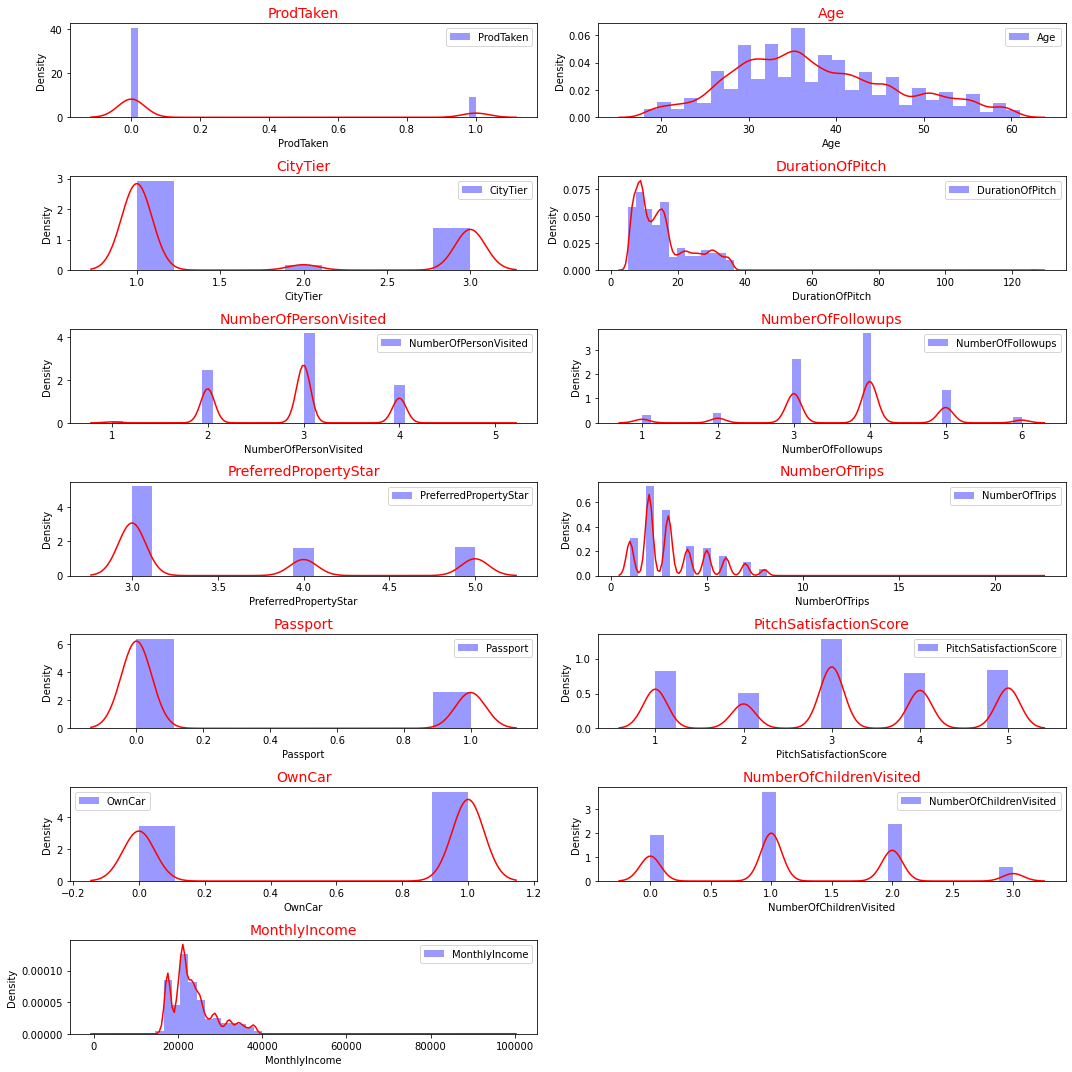

In [23]:
fig=pt.figure(figsize=(15,15))
for i,column in enumerate(contVariables):
    axes=fig.add_subplot(7,2,i+1)
    sns.distplot(df[column],color="blue",ax=axes,kde_kws={"color":"red","bw":0.1},label=column)
    axes.set_title(column,color="red",size=14)
    pt.legend()
    pt.tight_layout()
pt.show()

**CONTINUOUS VARIABLES**
*	Age, MonthlyIncome, DurationOfPitch variables are purely continuous in nature.
*	Age variable follows a normal distribution with many ups and downs. It has no outliers in it. 
*	Age has zero skewness value at 0.3
*	MonthlyIncome and DurationOfPitch has right skewed data in it. But still, they have Lower and Upper range outliers.
*	MonthlyIncome and DurationOfPitch has s right skewness value of 1.75, 1.94.
*	'CityTier', ProdTaken, 'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited' variables have only finite number of values and discrete in nature. They don’t follow normal distribution. They also have outliers but nothing needs to be treated for now.


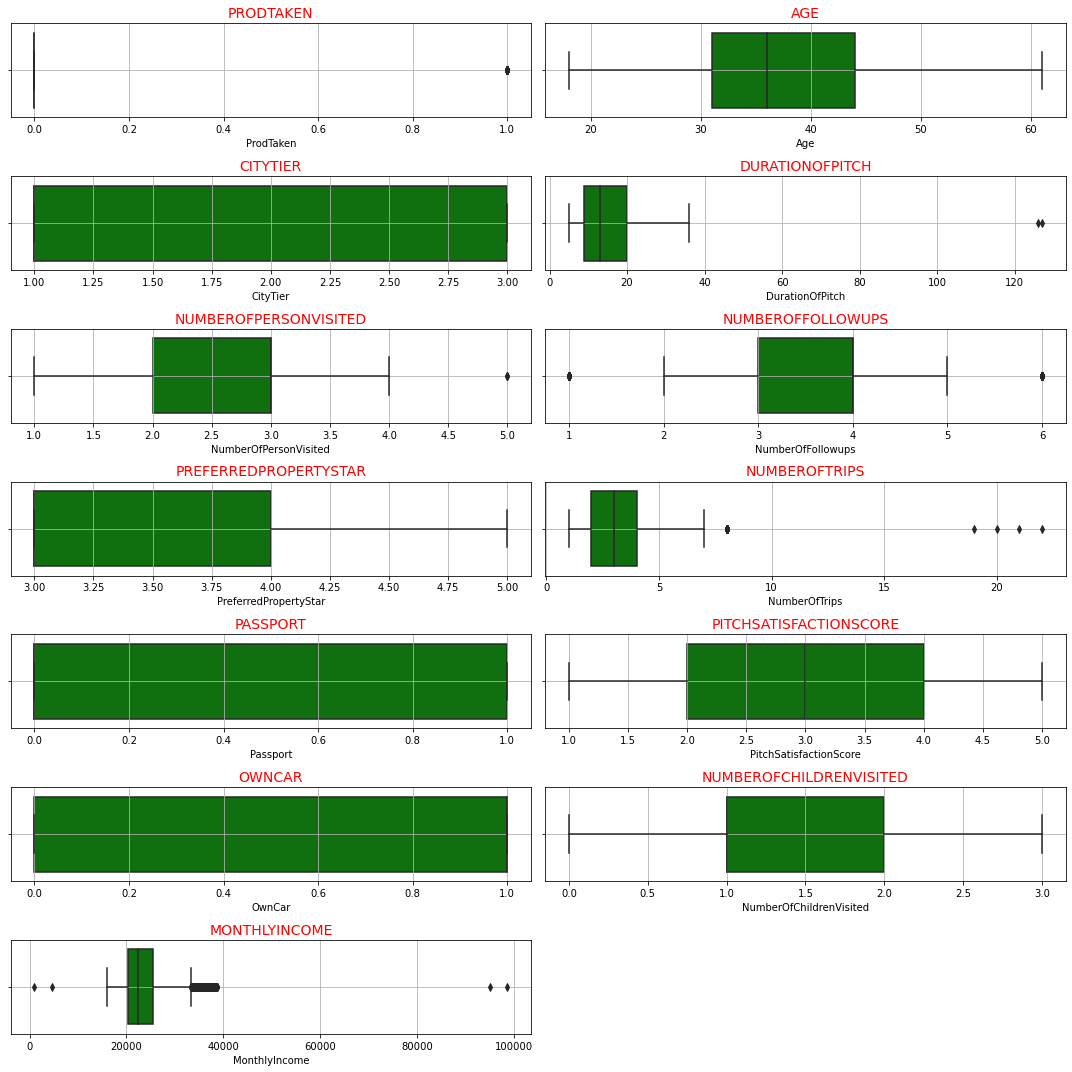

In [24]:
fig=pt.figure(figsize=(15,15))
for i,column in enumerate(contVariables):
    axes=fig.add_subplot(7,2,i+1)
    sns.boxplot(df[column],color="green")
    axes.set_title(str(column).upper(),color="red",size=14)
    pt.grid()
    pt.tight_layout()
pt.show()

In [25]:
df.skew()

ProdTaken                  1.595763
Age                        0.382989
CityTier                   0.736531
DurationOfPitch            1.752037
NumberOfPersonVisited      0.029817
NumberOfFollowups         -0.372719
PreferredPropertyStar      0.895545
NumberOfTrips              1.453884
Passport                   0.920980
PitchSatisfactionScore    -0.127726
OwnCar                    -0.495892
NumberOfChildrenVisited    0.272199
MonthlyIncome              1.949160
dtype: float64

# Bivariate Analysis

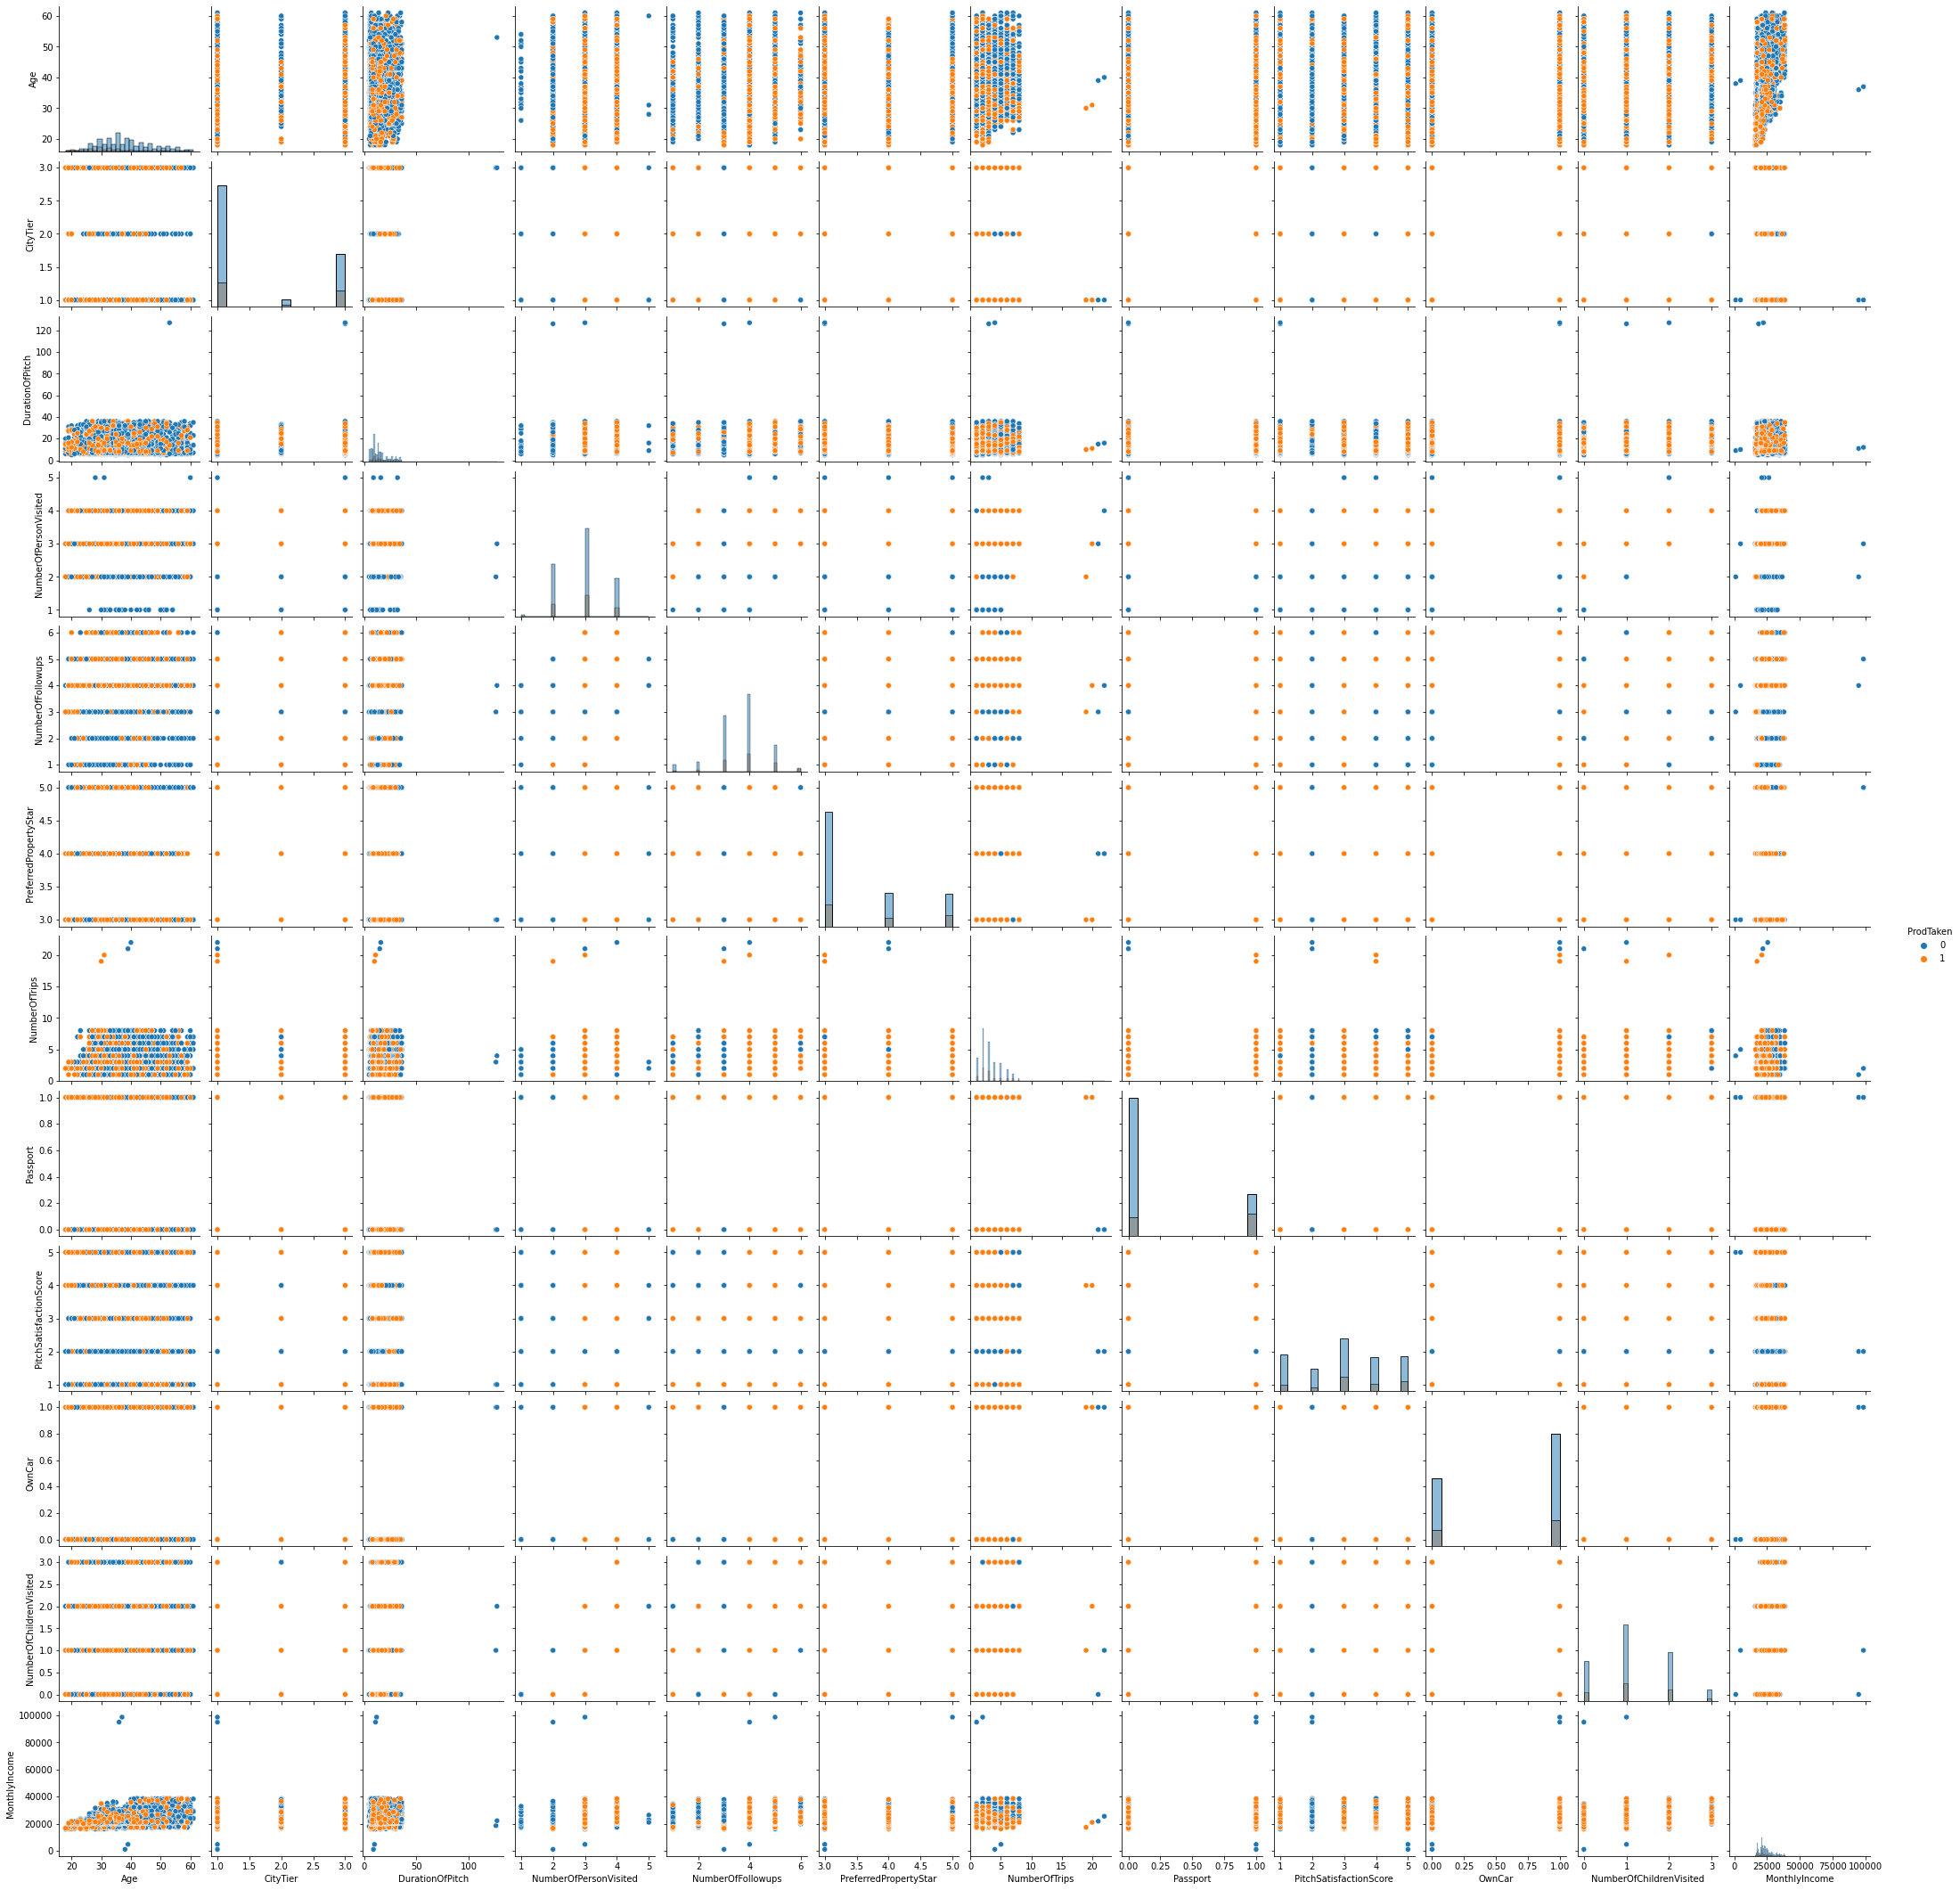

In [26]:
sns.pairplot(df,hue="ProdTaken",diag_kind="hist")

<AxesSubplot:>

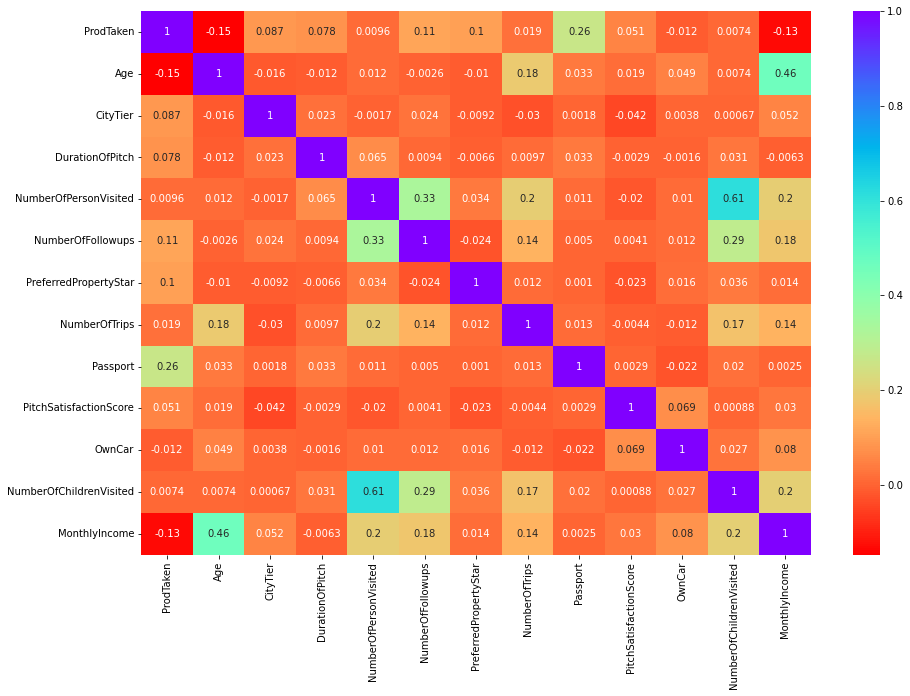

In [27]:
pt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="rainbow_r")

*	MonthlyIncome increases when designation of customer increases.
*	No variables are very well correlated to each other.
*	Number of persons visited and Number of children’s visited variables have 0.61 correlation with each other.
*	Next to that Age and MonthlyIncome have correlation of 0.33
*	No other variables have good correlation.
*	Negative correlation was seen between Age and ProdTaken at -0.15.


In [28]:
(df==0).sum()

ProdTaken                  3968
Age                           0
PreferredLoginDevice          0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisited         0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                   3466
PitchSatisfactionScore        0
OwnCar                     1856
NumberOfChildrenVisited    1082
Designation                   0
MonthlyIncome                 0
dtype: int64

Zero values observed in above variables are expected

In [29]:
df["ProdTaken"].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [30]:
df["ProdTaken"].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [31]:
df["Designation"].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



*   Most of the customers(1842) are working as a Executives.
*   Least number of customers(230) are working as Vice President.
*   No null value seen in Designation column.







In [32]:
df["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [33]:
df["Gender"]=df["Gender"].str.replace("Fe Male","Female")

In [34]:
df["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [35]:
df["Gender"].value_counts(normalize=True)

Male      0.596563
Female    0.403437
Name: Gender, dtype: float64

* Two different strings are seen for same variable so renamed 'Fe Male' to Female.

* Company is having male 2916 customers.

* Around 60% customers are Male and 40% are Female customers

* No null value seen in Gender column.

In [36]:
df["PreferredLoginDevice"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: PreferredLoginDevice, dtype: int64

In [37]:
df["PreferredLoginDevice"].isnull().sum()

25

In [38]:
grp=df.groupby(["MaritalStatus","Designation","CityTier"])
FillValue=grp["PreferredLoginDevice"].describe().top[1]

In [39]:
df["PreferredLoginDevice"]=df["PreferredLoginDevice"].fillna(value=FillValue)

In [40]:
df["PreferredLoginDevice"].isnull().sum()

0

* 25 Null values seen in variable PreferredLoginDevice.

* Most of the customers are doing self enquiry at the tourisn company.

* Missing value is imputed using the other two variables(MaritalStatus, Designation, CityTier)

* Based upon Designation customer can do Self enquiry or Company invited.

* Based upon Marital status also customer can visit the Tourism company for Self Enquiry.

* Based upon Citytier customer may or may not opt for travel to do SelfEnquiry

In [41]:
df["CityTier"].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

* Most of the customers are from Top Tier cities. Level 1 top cities are highly expensive.

* No null value seen in column CityTier.

* Level 2 city customers are very low. Only 198 customers are registered in the tourism company.

In [42]:
df.isnull().sum()

ProdTaken                    0
Age                        226
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [43]:
df.groupby(["MaritalStatus","Designation"])["Age"].describe()

count       mean       std   min    25%   50%  \
MaritalStatus Designation                                                     
Divorced      AVP              88.0  48.113636  4.836242  39.0  44.00  47.5   
              Executive       302.0  34.572848  9.083938  22.0  28.00  33.0   
              Manager         321.0  36.753894  7.883439  22.0  31.00  35.0   
              Senior Manager  142.0  41.598592  8.909362  27.0  35.00  39.5   
              VP               52.0  48.346154  6.274394  39.0  43.00  47.0   
Married       AVP             166.0  47.777108  6.394483  29.0  43.00  48.0   
              Executive       756.0  34.260582  8.167426  22.0  28.00  33.0   
              Manager         814.0  37.599509  7.535683  21.0  32.00  37.0   
              Senior Manager  379.0  40.385224  8.214350  26.0  35.00  38.0   
              VP              126.0  47.674603  5.626835  39.0  42.00  48.0   
Single        AVP              82.0  48.902439  7.399716  31.0  42.25  50.0   
              Executive       457.0  30.442013  8.795273  18.0  22.00  30.0   
              Manager         193.0  37.497409  8.938519  23.0  32.00  35.0   
              Senior Manager   50.0  42.740000  8.361257  19.0  37.00  41.0   
              VP               52.0  48.730769  7.143118  27.0  45.00  50.0   
Unmarried     AVP               6.0  41.666667  4.589844  39.0  40.00  40.0   
              Executive       183.0  32.087432  7.534755  20.0  26.50  32.0   
              Manager         323.0  37.390093  7.649311  25.0  32.00  36.0   
              Senior Manager  170.0  39.535294  8.132151  20.0  34.00  38.0   

                                75%   max  
MaritalStatus Designation                  
Divorced      AVP             52.00  57.0  
              Executive       38.00  60.0  
              Manager         42.00  58.0  
              Senior Manager  48.00  61.0  
              VP              53.00  61.0  
Married       AVP             53.00  59.0  
              Executive       38.00  60.0  
              Manager         42.00  61.0  
              Senior Manager  46.00  61.0  
              VP              51.00  61.0  
Single        AVP             55.00  60.0  
              Executive       35.00  59.0  
              Manager         43.00  60.0  
              Senior Manager  49.75  60.0  
              VP              55.00  59.0  
Unmarried     AVP             40.00  51.0  
              Executive       36.00  53.0  
              Manager         42.00  61.0  
              Senior Manager  45.75  60.0

In [44]:
df["Age"]=df.groupby(["MaritalStatus","Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

# Missing value imputation

In [45]:
df.isnull().sum()

ProdTaken                    0
Age                          0
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64



*  	Missing value for Age has been done based on MaritalStatus and Designation variables. Assumption made here is based people will be married at certain age. Designation of an employee goes up after years of experience.
*   Filled missing Age values with median value of group (MaritalStatus and Designation)



<AxesSubplot:xlabel='NumberOfPersonVisited', ylabel='DurationOfPitch'>

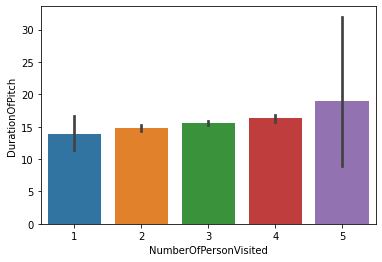

In [46]:
sns.barplot(df["NumberOfPersonVisited"],df["DurationOfPitch"])

In [47]:
df["DurationOfPitch"].describe()

count    4637.000000
mean       15.490835
std         8.519643
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

In [48]:
df["DurationOfPitch"]=df.groupby(["NumberOfPersonVisited","ProductPitched"])["DurationOfPitch"].transform(lambda x: x.fillna(x.mean()))

*	Missing value for DurationOfPitch has been done based on NumberofPersonsVisited and ProductPitched. DurationOfPitch increases when more number persons are visited.

In [49]:
df.isnull().sum()

ProdTaken                    0
Age                          0
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [50]:
df["NumberOfFollowups"]=df.groupby(["Occupation"])["NumberOfFollowups"].transform(lambda x: x.fillna(x.median()))

In [51]:
df.isnull().sum()

ProdTaken                    0
Age                          0
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [52]:
df["MonthlyIncome"]=df.groupby(["Occupation","Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))

In [53]:
df["IncomeType"]=pd.cut(df["MonthlyIncome"],bins=3,labels=["A","B","C"])

In [54]:
pd.cut(df["MonthlyIncome"],bins=3)

0       (902.322, 33559.333]
1       (902.322, 33559.333]
2       (902.322, 33559.333]
3       (902.322, 33559.333]
4       (902.322, 33559.333]
                ...         
4883    (902.322, 33559.333]
4884    (902.322, 33559.333]
4885    (902.322, 33559.333]
4886    (902.322, 33559.333]
4887    (902.322, 33559.333]
Name: MonthlyIncome, Length: 4888, dtype: category
Categories (3, interval[float64, right]): [(902.322, 33559.333] < (33559.333, 66118.667] < (66118.667, 98678.0]]

In [55]:
df["PreferredPropertyStar"]=df.groupby(["IncomeType"], sort=False)["PreferredPropertyStar"].transform(lambda x: x.fillna(x.mode().iloc[0]))

* Missing value for NumberOfFollowups given has been imputed based in occupation variable.
*	Missing value for PreferredPropertyStar is imputed based on salary. 
* MonthlyIncome missing values are imputed based on designation and occupation of the customer. Salary depends upon customers designation.


In [56]:
df.isnull().sum()

ProdTaken                    0
Age                          0
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome                0
IncomeType                   0
dtype: int64

In [57]:
df["NumberOfChildrenVisited"]=df.groupby(["MaritalStatus"])["NumberOfChildrenVisited"].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [58]:
df.isnull().sum()

ProdTaken                    0
Age                          0
PreferredLoginDevice         0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited      0
Designation                  0
MonthlyIncome                0
IncomeType                   0
dtype: int64

In [59]:
df["NumberOfTrips"]=df.groupby(["IncomeType"], sort=False)["NumberOfTrips"].transform(lambda x: x.fillna(x.mode().iloc[0]))

*	NumberOfChildrenVisited missing value is imputed based on MaritalStatus of customer.
*	NumberOfTrips missing value is imputed based upon Income of the customer. To visit more trips more money is needed. People earning higher will probably go for more trips.


In [60]:
df.isnull().sum()

ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
IncomeType                 0
dtype: int64

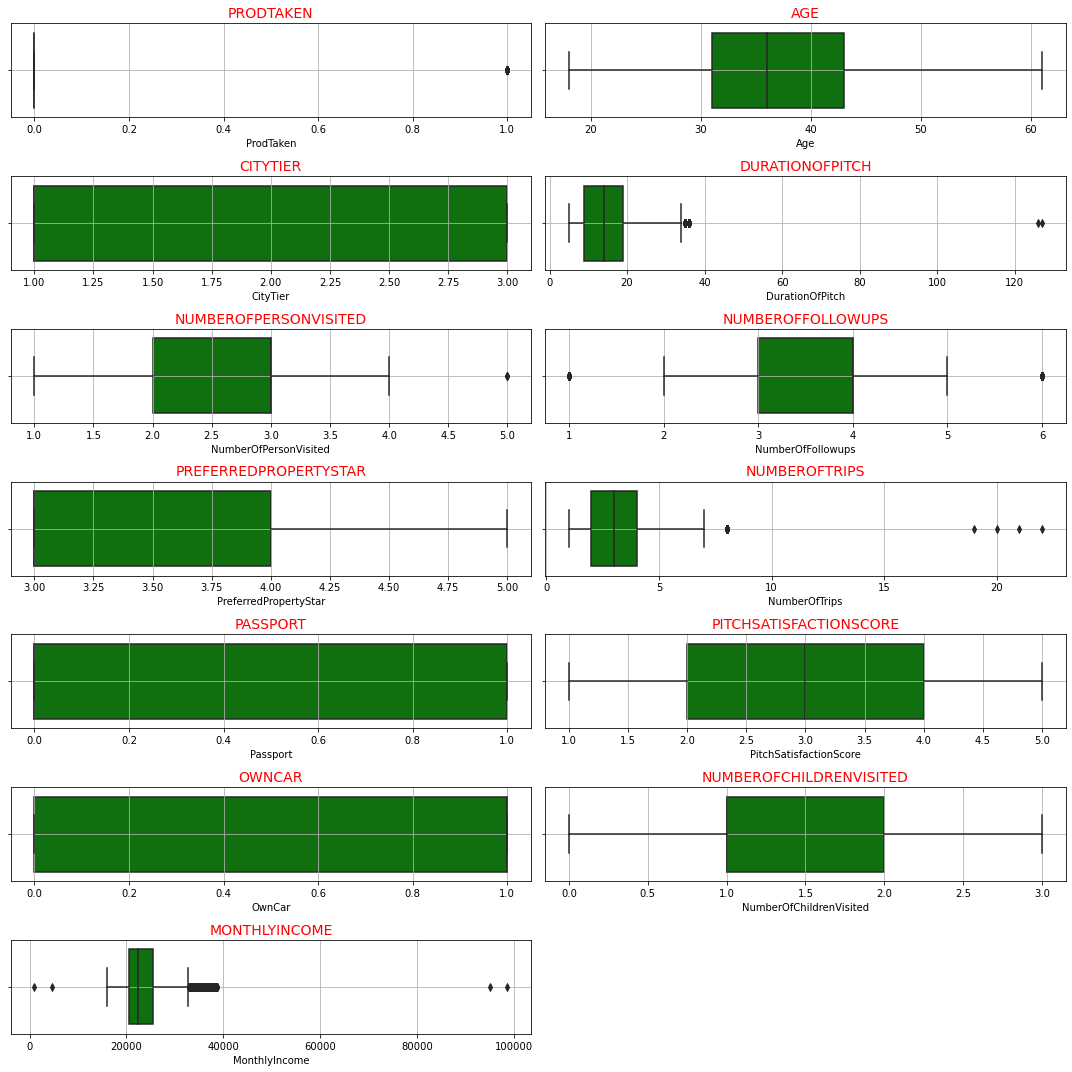

In [61]:
fig=pt.figure(figsize=(15,15))
for i,column in enumerate(contVariables):
    axes=fig.add_subplot(7,2,i+1)
    sns.boxplot(df[column],color="green")
    axes.set_title(str(column).upper(),color="red",size=14)
    pt.grid()
    pt.tight_layout()
pt.show()

# Outlier Removal

In [62]:
def removeOutliers(col):
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR=Q3-Q1
    UPR=Q3 + (1.5 * IQR)
    LPR=Q1 - (1.5 * IQR)
    return UPR, LPR

upr,lpr=removeOutliers("DurationOfPitch")
df["DurationOfPitch"]=np.where(df["DurationOfPitch"] > upr, upr, df["DurationOfPitch"])
df["DurationOfPitch"]=np.where(df["DurationOfPitch"] < lpr, lpr, df["DurationOfPitch"])

upr,lpr = removeOutliers("MonthlyIncome")
df["MonthlyIncome"]=np.where(df["MonthlyIncome"] > upr, upr, df["MonthlyIncome"])
df["MonthlyIncome"]=np.where(df["MonthlyIncome"] < lpr, lpr, df["MonthlyIncome"])

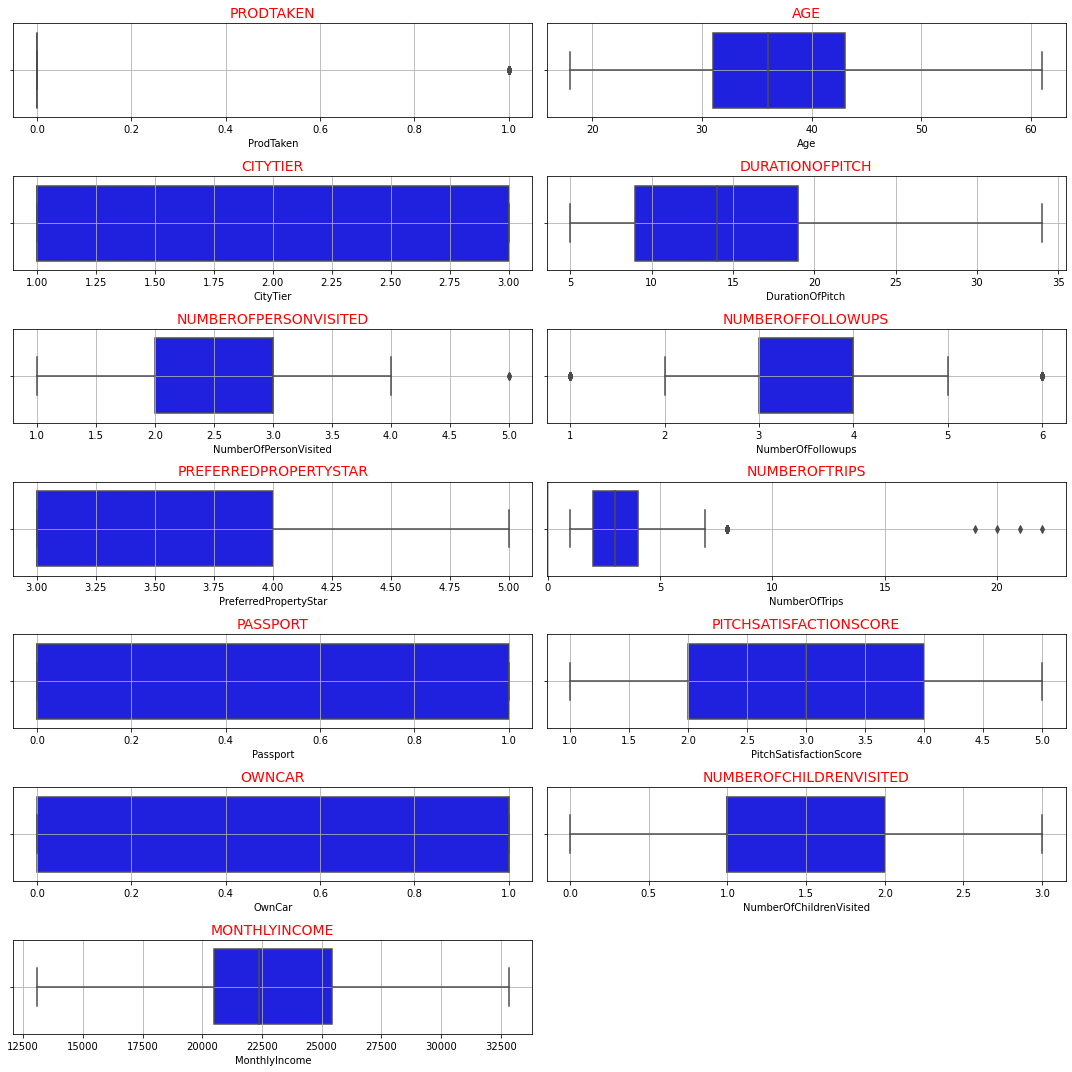

In [63]:
fig=pt.figure(figsize=(15,15))
for i,column in enumerate(contVariables):
    axes=fig.add_subplot(7,2,i+1)
    sns.boxplot(df[column],color="blue")
    axes.set_title(str(column).upper(),color="red",size=14)
    pt.grid()
    pt.tight_layout()
pt.show()

*	Outlier treatment has been done for MonthlyIncome and DurationOfPitch variables.
*	As these two variables behave purely as continuous and have some of the outliers.
*	Outliers are treated with Upper range and lower range values. Those are identified by 1.5 times the Interquartile value on either side.



In [64]:
df.dtypes

ProdTaken                     int64
Age                         float64
PreferredLoginDevice         object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisited         int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisited     float64
Designation                  object
MonthlyIncome               float64
IncomeType                 category
dtype: object

In [65]:
df.dtypes[df.dtypes=="float64"]

Age                        float64
DurationOfPitch            float64
NumberOfFollowups          float64
PreferredPropertyStar      float64
NumberOfTrips              float64
NumberOfChildrenVisited    float64
MonthlyIncome              float64
dtype: object

In [66]:
df["NumberOfFollowups"].unique()

array([3., 4., 2., 5., 1., 6.])

In [67]:
df["NumberOfFollowups"]=df["NumberOfFollowups"].astype("int64")

In [68]:
df["PreferredPropertyStar"].unique()

array([3., 4., 5.])

In [69]:
df["PreferredPropertyStar"]=df["PreferredPropertyStar"].astype("int64")

In [70]:
df["NumberOfChildrenVisited"].unique()

array([0., 2., 1., 3.])

In [71]:
df["NumberOfChildrenVisited"]=df["NumberOfChildrenVisited"].astype("int64")

In [72]:
df["NumberOfTrips"].unique()


array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., 20., 22.])

In [73]:
df["NumberOfTrips"].nunique()

12

In [74]:
df["NumberOfTrips"]=df["NumberOfTrips"].astype("int64")

In [75]:
df.dtypes

ProdTaken                     int64
Age                         float64
PreferredLoginDevice         object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisited         int64
NumberOfFollowups             int64
ProductPitched               object
PreferredPropertyStar         int64
MaritalStatus                object
NumberOfTrips                 int64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisited       int64
Designation                  object
MonthlyIncome               float64
IncomeType                 category
dtype: object

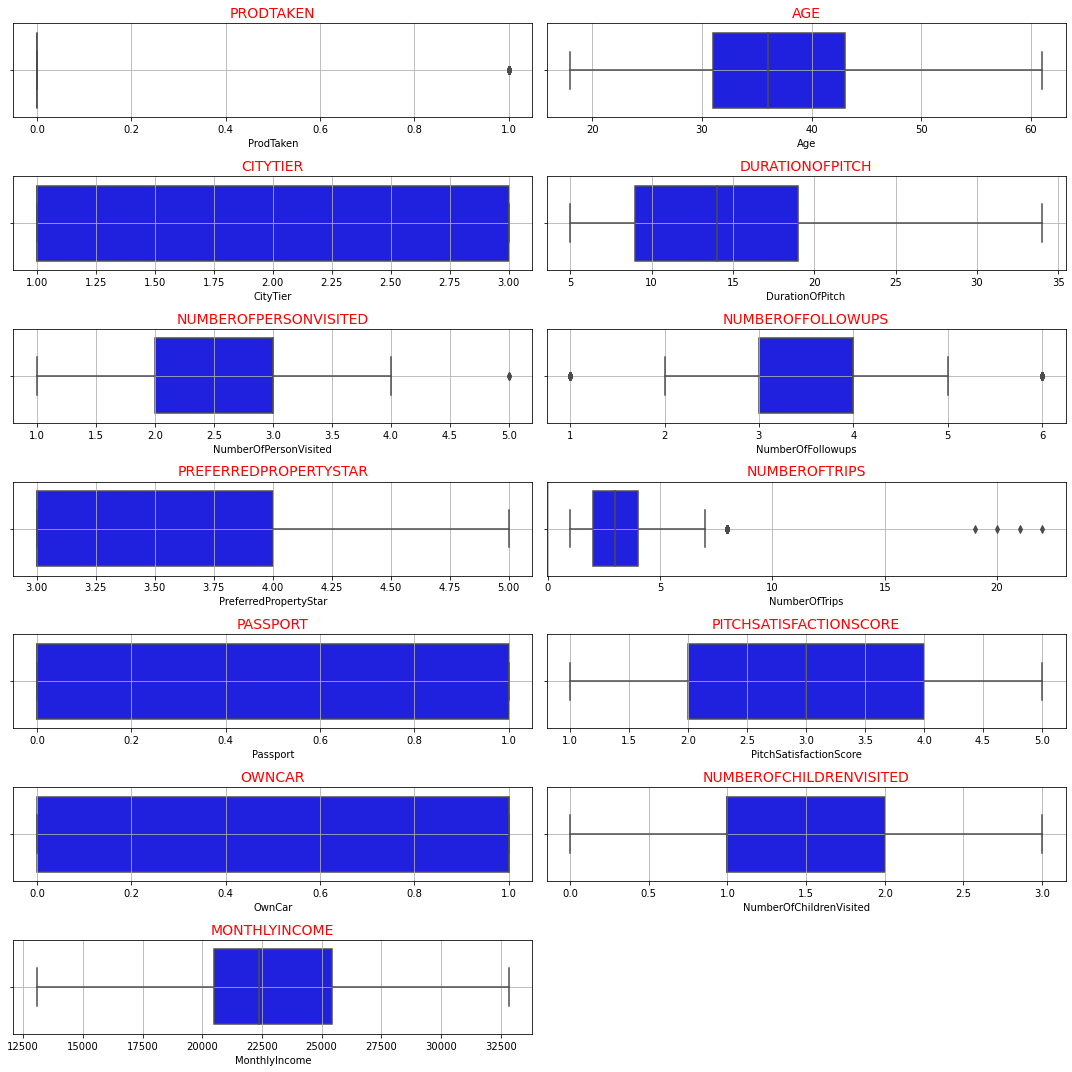

In [76]:
fig=pt.figure(figsize=(15,15))
for i,column in enumerate(contVariables):
    axes=fig.add_subplot(7,2,i+1)
    sns.boxplot(df[column],color="blue")
    axes.set_title(str(column).upper(),color="red",size=14)
    pt.grid()
    pt.tight_layout()
pt.show()

# Variable Transformation

In [77]:
df.dtypes[df.dtypes=="object"]

PreferredLoginDevice    object
Occupation              object
Gender                  object
ProductPitched          object
MaritalStatus           object
Designation             object
dtype: object

In [78]:
df.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,IncomeType
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3,Super Deluxe,3,Single,1,1,2,1,0,Manager,20993.0,A
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4,Super Deluxe,4,Divorced,2,0,3,1,2,Manager,20130.0,A
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4,Multi,3,Single,7,1,3,0,0,Executive,17090.0,A
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3,Multi,3,Divorced,2,1,5,1,1,Executive,17909.0,A
4,0,33.0,Self Enquiry,1,8.0,Small Business,Male,2,3,Multi,4,Divorced,1,0,5,1,0,Executive,18468.0,A


In [79]:
df.to_excel("Tourism2.xlsx")

In [80]:
df.dtypes[df.dtypes=="object"]

PreferredLoginDevice    object
Occupation              object
Gender                  object
ProductPitched          object
MaritalStatus           object
Designation             object
dtype: object

In [81]:
df["LoginType"]=pd.get_dummies(df["PreferredLoginDevice"],drop_first=True)

In [82]:
df.drop(["PreferredLoginDevice"],axis=1,inplace=True)

In [83]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,IncomeType,LoginType
0,1,41.0,3,6.0,Salaried,Female,3,3,Super Deluxe,3,Single,1,1,2,1,0,Manager,20993.0,A,1
1,0,49.0,1,14.0,Salaried,Male,3,4,Super Deluxe,4,Divorced,2,0,3,1,2,Manager,20130.0,A,0
2,1,37.0,1,8.0,Free Lancer,Male,3,4,Multi,3,Single,7,1,3,0,0,Executive,17090.0,A,1
3,0,33.0,1,9.0,Salaried,Female,2,3,Multi,3,Divorced,2,1,5,1,1,Executive,17909.0,A,0
4,0,33.0,1,8.0,Small Business,Male,2,3,Multi,4,Divorced,1,0,5,1,0,Executive,18468.0,A,1


In [84]:
df["Male_Customer"]=pd.get_dummies(df["Gender"],drop_first=True)

In [85]:
df.drop("Gender",axis=1,inplace=True)

In [86]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,IncomeType,LoginType,Male_Customer
0,1,41.0,3,6.0,Salaried,3,3,Super Deluxe,3,Single,1,1,2,1,0,Manager,20993.0,A,1,0
1,0,49.0,1,14.0,Salaried,3,4,Super Deluxe,4,Divorced,2,0,3,1,2,Manager,20130.0,A,0,1
2,1,37.0,1,8.0,Free Lancer,3,4,Multi,3,Single,7,1,3,0,0,Executive,17090.0,A,1,1
3,0,33.0,1,9.0,Salaried,2,3,Multi,3,Divorced,2,1,5,1,1,Executive,17909.0,A,0,0
4,0,33.0,1,8.0,Small Business,2,3,Multi,4,Divorced,1,0,5,1,0,Executive,18468.0,A,1,1


In [87]:
df.Designation.unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [88]:
df["Designation"]=df["Designation"].replace({"Executive":1,"Manager":2,"Senior Manager":3,"AVP":4,"VP":5})

In [89]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,IncomeType,LoginType,Male_Customer
0,1,41.0,3,6.0,Salaried,3,3,Super Deluxe,3,Single,1,1,2,1,0,2,20993.0,A,1,0
1,0,49.0,1,14.0,Salaried,3,4,Super Deluxe,4,Divorced,2,0,3,1,2,2,20130.0,A,0,1
2,1,37.0,1,8.0,Free Lancer,3,4,Multi,3,Single,7,1,3,0,0,1,17090.0,A,1,1
3,0,33.0,1,9.0,Salaried,2,3,Multi,3,Divorced,2,1,5,1,1,1,17909.0,A,0,0
4,0,33.0,1,8.0,Small Business,2,3,Multi,4,Divorced,1,0,5,1,0,1,18468.0,A,1,1


In [90]:
df.ProductPitched.unique()

array(['Super Deluxe', 'Multi', 'Standard', 'Deluxe', 'King'],
      dtype=object)

In [91]:
df.ProductPitched=df.ProductPitched.replace({"Standard":1,"Multi":2,"Deluxe":3,"Super Deluxe":4,"King":5})

In [92]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,IncomeType,LoginType,Male_Customer
0,1,41.0,3,6.0,Salaried,3,3,4,3,Single,1,1,2,1,0,2,20993.0,A,1,0
1,0,49.0,1,14.0,Salaried,3,4,4,4,Divorced,2,0,3,1,2,2,20130.0,A,0,1
2,1,37.0,1,8.0,Free Lancer,3,4,2,3,Single,7,1,3,0,0,1,17090.0,A,1,1
3,0,33.0,1,9.0,Salaried,2,3,2,3,Divorced,2,1,5,1,1,1,17909.0,A,0,0
4,0,33.0,1,8.0,Small Business,2,3,2,4,Divorced,1,0,5,1,0,1,18468.0,A,1,1


In [93]:
df.drop(["IncomeType"],axis=1,inplace=True)

In [94]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,LoginType,Male_Customer
0,1,41.0,3,6.0,Salaried,3,3,4,3,Single,1,1,2,1,0,2,20993.0,1,0
1,0,49.0,1,14.0,Salaried,3,4,4,4,Divorced,2,0,3,1,2,2,20130.0,0,1
2,1,37.0,1,8.0,Free Lancer,3,4,2,3,Single,7,1,3,0,0,1,17090.0,1,1
3,0,33.0,1,9.0,Salaried,2,3,2,3,Divorced,2,1,5,1,1,1,17909.0,0,0
4,0,33.0,1,8.0,Small Business,2,3,2,4,Divorced,1,0,5,1,0,1,18468.0,1,1


In [95]:
Occu=pd.get_dummies(df["Occupation"],drop_first=True)

In [96]:
df.drop(["Occupation"],axis=1,inplace=True)

In [97]:
df=pd.concat([df,Occu],axis=1)

In [98]:
Mari=pd.get_dummies(df["MaritalStatus"],drop_first=True)
df.drop(["MaritalStatus"],axis=1,inplace=True)

In [99]:
df=pd.concat([df,Mari],axis=1)

In [100]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,...,Designation,MonthlyIncome,LoginType,Male_Customer,Large Business,Salaried,Small Business,Married,Single,Unmarried
0,1,41.0,3,6.0,3,3,4,3,1,1,...,2,20993.0,1,0,0,1,0,0,1,0
1,0,49.0,1,14.0,3,4,4,4,2,0,...,2,20130.0,0,1,0,1,0,0,0,0
2,1,37.0,1,8.0,3,4,2,3,7,1,...,1,17090.0,1,1,0,0,0,0,1,0
3,0,33.0,1,9.0,2,3,2,3,2,1,...,1,17909.0,0,0,0,1,0,0,0,0
4,0,33.0,1,8.0,2,3,2,4,1,0,...,1,18468.0,1,1,0,0,1,0,0,0


**One-Hot Encoding:** We use this when no of features is less and they are not ordinal type data. 
* One hot encoding is done for variables Gender, PreferredLoginType, MaritalStatus, Occupation. One hot encoding is done using pandas get_dummies function.

**Label Encoding:** We use this when features in data are ordinal type data. 
*	Label Encoding done for ProductPitched and Designation variables.




In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4888 non-null   float64
 2   CityTier                 4888 non-null   int64  
 3   DurationOfPitch          4888 non-null   float64
 4   NumberOfPersonVisited    4888 non-null   int64  
 5   NumberOfFollowups        4888 non-null   int64  
 6   ProductPitched           4888 non-null   int64  
 7   PreferredPropertyStar    4888 non-null   int64  
 8   NumberOfTrips            4888 non-null   int64  
 9   Passport                 4888 non-null   int64  
 10  PitchSatisfactionScore   4888 non-null   int64  
 11  OwnCar                   4888 non-null   int64  
 12  NumberOfChildrenVisited  4888 non-null   int64  
 13  Designation              4888 non-null   int64  
 14  MonthlyIncome           

In [102]:
PerformanceTable=pd.DataFrame(index=["AUC","Accuracy Score","Recall Score","Precision Score","F1 Score"])

In [103]:
def printModelReport(model_name,TestY,PredictedTestY,TrainY,PredictedTrainY,TestYProb,TrainYProb):
    test_AUC=round(roc_auc_score(TestY,TestYProb)*100,2)
    test_Accuracy= round(accuracy_score(TestY,PredictedTestY)*100,2)
    test_Recall=round(recall_score(TestY,PredictedTestY)*100,2)
    test_Precision=round(precision_score(TestY,PredictedTestY)*100,2)
    test_F1Score=round(f1_score(TestY,PredictedTestY)*100,2)
    
    train_AUC=round(roc_auc_score(TrainY,TrainYProb)*100,2)
    train_Accuracy=round(accuracy_score(TrainY,PredictedTrainY)*100,2)
    train_Recall=round(recall_score(TrainY,PredictedTrainY)*100,2)
    train_Precision=round(precision_score(TrainY,PredictedTrainY)*100,2)
    train_F1Score=round(f1_score(TrainY,PredictedTrainY)*100,2)
    
    PerformanceTable["%s_Test" %(model_name)]=[test_AUC,test_Accuracy,test_Recall,test_Precision,test_F1Score]
    PerformanceTable["%s_Train" %(model_name)]=[train_AUC,train_Accuracy,train_Recall,train_Precision,train_F1Score]
    
    print(f"Accuracy Score of {model_name} Model with Test data :" , test_Accuracy)
    print(f"Accuracy Score of {model_name} Model with Train data :",train_Accuracy)
    print()
    print(f"Confusion Matrix of {model_name} Model with Test data :\n")
    sns.heatmap((confusion_matrix(TestY,PredictedTestY)),annot=True,fmt='.5g',cmap="Blues")
    pt.show()
    print(f"Confusion Matrix of {model_name} Model with Train data :\n")
    sns.heatmap((confusion_matrix(TrainY,PredictedTrainY)),annot=True,fmt='.5g',cmap="Oranges")
    pt.show()
    print()
    print(f"Classification report of {model_name} Model with Test data :\n" , classification_report(TestY,PredictedTestY))
    print(f"Classification report of {model_name} Model with Train data :\n",classification_report(TrainY,PredictedTrainY))
    print()
    print(f'Area under the curve for {model_name} test data is',test_AUC)
    print(f'Area under the curve for {model_name} train data is',train_AUC)
    pt.figure(figsize=(8,6))
    fpr_test, tpr_test, thresholds = roc_curve(TestY, TestYProb)
    pt.plot(fpr_test, tpr_test, marker='.',label="Test") 
    fpr_train, tpr_train, thresholds = roc_curve(TrainY, TrainYProb)                                         
    pt.plot(fpr_train, tpr_train, marker='*',label="Train") 
    pt.title('ROC Curve for {}'.format(model_name))
    pt.xlabel('FPR(Specificity)')
    pt.ylabel('TPR(Sensitivity)')
    pt.legend(loc=0)
    pt.tight_layout()
    pt.show()

In [104]:
cols=[]
for col in df.columns:
    li=col.split(sep=" ")
    li=list(filter(None, li))
    c="_".join(li)
    cols.append(c)
print(cols)

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'LoginType', 'Male_Customer', 'Large_Business', 'Salaried', 'Small_Business', 'Married', 'Single', 'Unmarried']


In [105]:
df.columns=cols

In [106]:
df2=df.copy()

In [107]:
X=df2.drop(["ProdTaken"],axis=1)
y=df2.pop("ProdTaken")

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 43)

# Model Building

# Decision Tree 

In [109]:
#MODEL 1 :Decision Tree Classifier Model

DecisionTreeModel=DecisionTreeClassifier(criterion="gini",random_state=0)

In [110]:
DecisionTreeModel.fit(X_train,y_train)
ytest_pred_DTM=DecisionTreeModel.predict(X_test)
ytrain_pred_DTM=DecisionTreeModel.predict(X_train)
ytest_pred_prob_DTM=DecisionTreeModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_DTM=DecisionTreeModel.predict_proba(X_train)[:,1]

In [111]:
train_char_label = ["0","1"]
ld_Tree_File = open('C:/Users/Ritu/Documents/Tree_File.dot','w')
dot_data = export_graphviz(DecisionTreeModel, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X), 
                                class_names = train_char_label)
ld_Tree_File.close()


In [112]:
print(DecisionTreeModel.feature_importances_)

[0.13260319 0.04175357 0.1314424  0.0204095  0.05474969 0.02425081
 0.04678774 0.0641801  0.063041   0.05983791 0.01945518 0.01226268
 0.07918917 0.0866391  0.02096582 0.01953628 0.03193741 0.02256659
 0.01201215 0.00768078 0.027782   0.02091694]


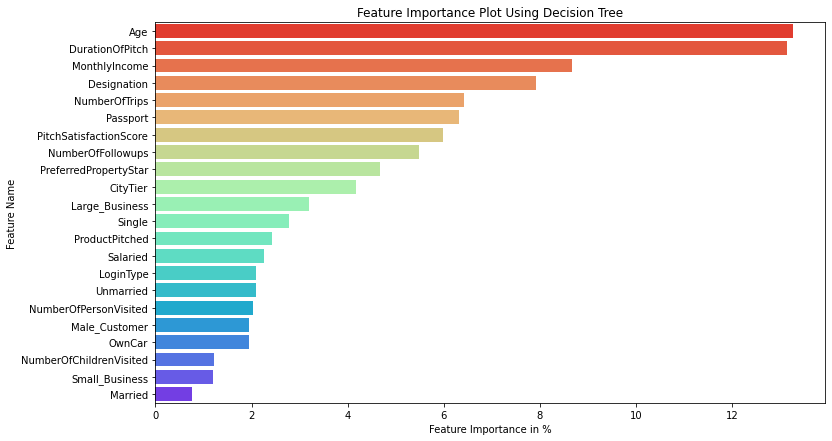

In [113]:
Z=pd.DataFrame(DecisionTreeModel.feature_importances_*100,index=X.columns).sort_values(by=0,ascending=False)
pt.figure(figsize=(12,7))
sns.barplot(Z[0],Z.index,palette='rainbow_r')
pt.ylabel('Feature Name')
pt.xlabel('Feature Importance in %')
pt.title('Feature Importance Plot Using Decision Tree')
pt.show()

Accuracy Score of DecisionTree Model with Test data : 90.46
Accuracy Score of DecisionTree Model with Train data : 100.0

Confusion Matrix of DecisionTree Model with Test data :



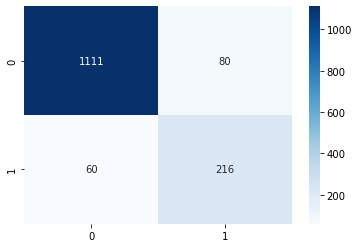

Confusion Matrix of DecisionTree Model with Train data :



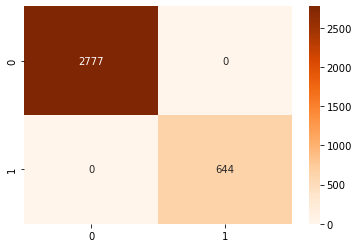


Classification report of DecisionTree Model with Test data :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1191
           1       0.73      0.78      0.76       276

    accuracy                           0.90      1467
   macro avg       0.84      0.86      0.85      1467
weighted avg       0.91      0.90      0.91      1467

Classification report of DecisionTree Model with Train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


Area under the curve for DecisionTree test data is 85.77
Area under the curve for DecisionTree train data is 100.0


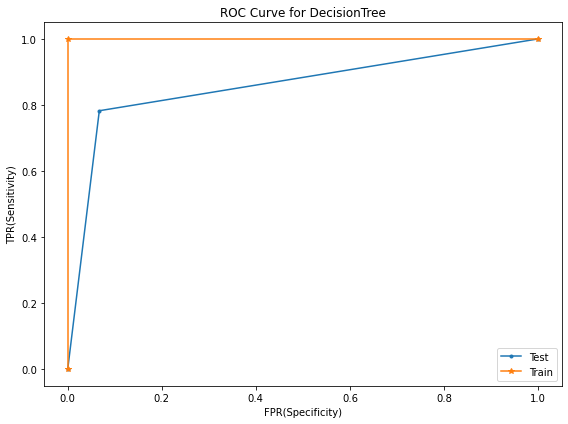

In [114]:
printModelReport("DecisionTree",y_test,ytest_pred_DTM,y_train,ytrain_pred_DTM,ytest_pred_prob_DTM,ytrain_pred_prob_DTM)

In [225]:
PerformanceTable

,DecisionTree_Test,DecisionTree_Train,RandomForest_Test,RandomForest_Train,MLPModel_Test,MLPModel_Train,Logistic_Test,Logistic_Train,LDA1_Test,LDA1_Train,...,RandomForestTuned_Test,RandomForestTuned_Train,KNN_Tuned_Test,KNN_Tuned_Train,SVC_Tuned_Test,SVC_Tuned_Train,Naive2_Tuned_Test,Naive2_Tuned_Train,LogitTunedTrain,LogitTunedTest
AUC,85.77,100.0,96.27,100.0,50.00,50.00,68.22,73.47,78.62,81.06,...,91.05,98.16,62.96,77.49,88.97,100.0,73.24,77.09,77.34,75.87
Accuracy Score,90.46,100.0,90.73,100.0,81.19,81.18,82.21,82.78,82.75,84.39,...,86.37,92.17,80.50,81.12,89.84,100.0,83.37,83.81,70.44,70.06
Recall Score,78.26,100.0,55.80,100.0,0.00,0.00,10.51,14.13,21.74,31.52,...,38.77,62.11,5.80,9.01,49.64,100.0,26.81,30.43,74.00,70.00
Precision Score,72.97,100.0,91.67,100.0,0.00,0.00,67.44,71.65,61.86,68.58,...,77.54,94.34,38.10,49.15,93.20,100.0,63.79,64.90,36.00,35.00
F1 Score,75.52,100.0,69.37,100.0,0.00,0.00,18.18,23.61,32.17,43.19,...,51.69,74.91,10.06,15.22,64.78,100.0,37.76,41.44,48.00,47.00


*	Decision tree model is pruned to achieve better results and better prediction.
*	After pruning best parameters identified are {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}.
*	This model is now made fit to predict from overfitting.
* 	After accuracy score of train and test data are 83 and 82%
*	Average F1 score value seen in this model.
* AUC ROC score for train and test data are 84 and 78%


# Random Forest

In [115]:
# MODEL 2 : Random Forest Classifier Model

RandomForestModel=RandomForestClassifier(random_state=0,oob_score=True)

In [116]:
RandomForestModel.fit(X_train,y_train)
ytest_pred_RF=RandomForestModel.predict(X_test)
ytrain_pred_RF=RandomForestModel.predict(X_train)
ytest_pred_prob_RF=RandomForestModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_RF=RandomForestModel.predict_proba(X_train)[:,1]

Accuracy Score of RandomForest Model with Test data : 90.73
Accuracy Score of RandomForest Model with Train data : 100.0

Confusion Matrix of RandomForest Model with Test data :



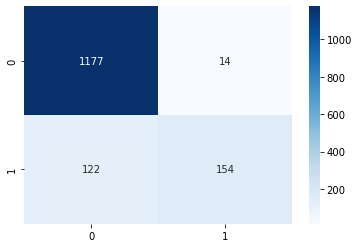

Confusion Matrix of RandomForest Model with Train data :



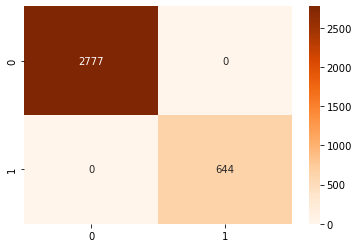


Classification report of RandomForest Model with Test data :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1191
           1       0.92      0.56      0.69       276

    accuracy                           0.91      1467
   macro avg       0.91      0.77      0.82      1467
weighted avg       0.91      0.91      0.90      1467

Classification report of RandomForest Model with Train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


Area under the curve for RandomForest test data is 96.27
Area under the curve for RandomForest train data is 100.0


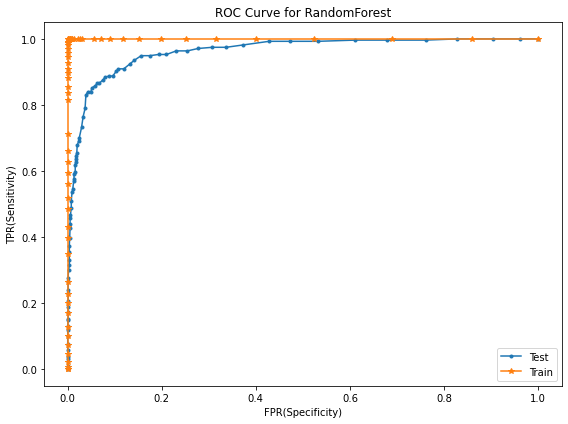

In [117]:
printModelReport("RandomForest",y_test,ytest_pred_RF,y_train,ytrain_pred_RF,ytest_pred_prob_RF,ytrain_pred_prob_RF)

In [118]:
PerformanceTable

,DecisionTree_Test,DecisionTree_Train,RandomForest_Test,RandomForest_Train
AUC,85.77,100.0,96.27,100.0
Accuracy Score,90.46,100.0,90.73,100.0
Recall Score,78.26,100.0,55.80,100.0
Precision Score,72.97,100.0,91.67,100.0
F1 Score,75.52,100.0,69.37,100.0


*	This is also a tree-based model helps in predicting the target variable by building large number of decision trees.
*	This model also shows an accuracy of 100% results with train data and 90% with test. This model is an overfitting model.
*	As Random Forest model was not pruned properly so it leaded to model overfitting.
*	We can see a large difference between Random Forest train and Test models. 100% accuracy in training data and 90% accuracy in testing data.


# Neural Network MLP Classifier

In [119]:
# MODEL 3 : MLP Classifier

MLPModel=MLPClassifier(solver='sgd',random_state=0)

In [120]:
MLPModel.fit(X_train,y_train)
ytest_pred_MLP=MLPModel.predict(X_test)
ytrain_pred_MLP=MLPModel.predict(X_train)
ytest_pred_prob_MLP=MLPModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_MLP=MLPModel.predict_proba(X_train)[:,1]

Accuracy Score of MLPModel Model with Test data : 81.19
Accuracy Score of MLPModel Model with Train data : 81.18

Confusion Matrix of MLPModel Model with Test data :



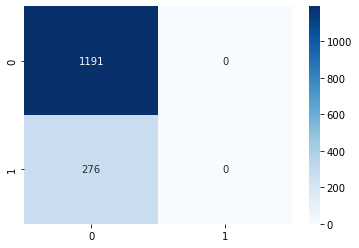

Confusion Matrix of MLPModel Model with Train data :



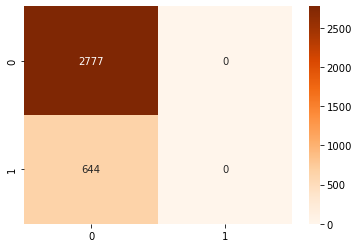


Classification report of MLPModel Model with Test data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1191
           1       0.00      0.00      0.00       276

    accuracy                           0.81      1467
   macro avg       0.41      0.50      0.45      1467
weighted avg       0.66      0.81      0.73      1467

Classification report of MLPModel Model with Train data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2777
           1       0.00      0.00      0.00       644

    accuracy                           0.81      3421
   macro avg       0.41      0.50      0.45      3421
weighted avg       0.66      0.81      0.73      3421


Area under the curve for MLPModel test data is 50.0
Area under the curve for MLPModel train data is 50.0


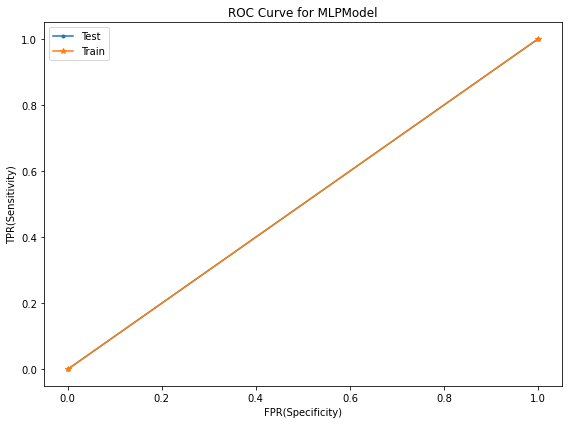

In [121]:
printModelReport("MLPModel",y_test,ytest_pred_MLP,y_train,ytrain_pred_MLP,ytest_pred_prob_MLP,ytrain_pred_prob_MLP)

# Logistic Regression

In [122]:
# Model 4 : Logistic Regression Model

LogisticRegression().get_params().keys()

LogisticModel=LogisticRegression()
LogisticModel.fit(X_train,y_train)

LogisticRegression()

In [123]:
LogisticModel.fit(X_train,y_train)
ytest_pred_Logistic=LogisticModel.predict(X_test)
ytrain_pred_Logistic=LogisticModel.predict(X_train)
ytest_pred_prob_Logistic=LogisticModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_Logistic=LogisticModel.predict_proba(X_train)[:,1]

In [124]:
LogisticModel.coef_

array([[-3.66157004e-02,  1.43631998e-01,  2.36359917e-02,
         6.80053055e-02,  2.49025490e-01, -2.40325553e-01,
         1.85175862e-01,  2.02122690e-01,  1.92500426e-01,
         1.65419607e-01,  3.45415817e-03,  5.79407230e-02,
        -1.35844546e-01, -1.33533867e-04, -3.24064290e-02,
         2.76975208e-02,  4.03161554e-02, -1.32794295e-02,
        -1.73513413e-02, -7.57006296e-02,  1.02912574e-01,
         3.17691778e-02]])

In [125]:
for i,cof in enumerate(LogisticModel.coef_[0]):
    print("The coefficient for", X.columns[i],"is",cof)
print()

The coefficient for Age is -0.03661570042563109
The coefficient for CityTier is 0.14363199834424964
The coefficient for DurationOfPitch is 0.023635991707730057
The coefficient for NumberOfPersonVisited is 0.06800530549229308
The coefficient for NumberOfFollowups is 0.24902549012035183
The coefficient for ProductPitched is -0.2403255527967121
The coefficient for PreferredPropertyStar is 0.18517586211957895
The coefficient for NumberOfTrips is 0.2021226903081526
The coefficient for Passport is 0.192500426337571
The coefficient for PitchSatisfactionScore is 0.16541960651626367
The coefficient for OwnCar is 0.0034541581740298536
The coefficient for NumberOfChildrenVisited is 0.05794072300775892
The coefficient for Designation is -0.13584454613194452
The coefficient for MonthlyIncome is -0.00013353386669469263
The coefficient for LoginType is -0.032406429008384925
The coefficient for Male_Customer is 0.027697520790153946
The coefficient for Large_Business is 0.04031615535831226
The coeffici

Accuracy Score of Logistic Model with Test data : 82.21
Accuracy Score of Logistic Model with Train data : 82.78

Confusion Matrix of Logistic Model with Test data :



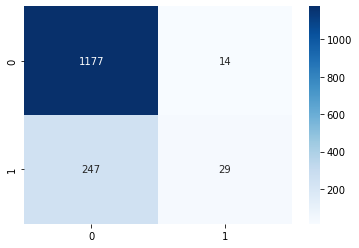

Confusion Matrix of Logistic Model with Train data :



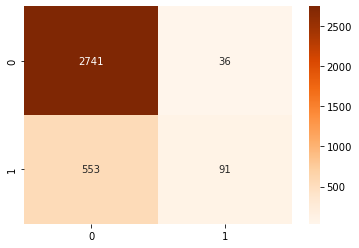


Classification report of Logistic Model with Test data :
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1191
           1       0.67      0.11      0.18       276

    accuracy                           0.82      1467
   macro avg       0.75      0.55      0.54      1467
weighted avg       0.80      0.82      0.77      1467

Classification report of Logistic Model with Train data :
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2777
           1       0.72      0.14      0.24       644

    accuracy                           0.83      3421
   macro avg       0.77      0.56      0.57      3421
weighted avg       0.81      0.83      0.78      3421


Area under the curve for Logistic test data is 68.22
Area under the curve for Logistic train data is 73.47


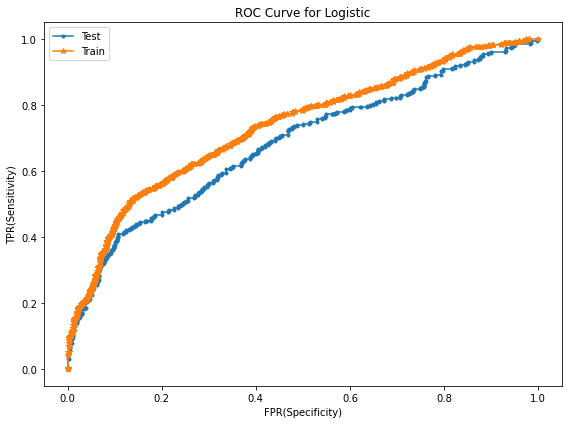

In [126]:
printModelReport("Logistic",y_test,ytest_pred_Logistic,y_train,ytrain_pred_Logistic,ytest_pred_prob_Logistic,ytrain_pred_prob_Logistic)

# Logit Model

In [127]:
# Model 5 : Logit Model

import statsmodels.api as sm
LogisModelStats = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.369675
         Iterations 7


In [128]:
LogisModelStats.params

Age                       -0.016839
CityTier                   0.502895
DurationOfPitch            0.033186
NumberOfPersonVisited     -0.035340
NumberOfFollowups          0.397476
ProductPitched            -0.399204
PreferredPropertyStar      0.419781
NumberOfTrips              0.082550
Passport                   1.511144
PitchSatisfactionScore     0.121385
OwnCar                     0.066685
NumberOfChildrenVisited   -0.066667
Designation               -0.479008
MonthlyIncome             -0.000027
LoginType                 -0.366657
Male_Customer              0.282095
Large_Business            -3.782708
Salaried                  -4.318588
Small_Business            -4.419147
Married                    0.194501
Single                     1.357715
Unmarried                  0.829918
dtype: float64

In [129]:
LogisModelStats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 3421
Model:                          Logit   Df Residuals:                     3399
Method:                           MLE   Df Model:                           21
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2357
Time:                        21:12:24   Log-Likelihood:                -1264.7
converged:                       True   LL-Null:                       -1654.6
Covariance Type:            nonrobust   LLR p-value:                1.587e-151
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0168      0.007     -2.538      0.011      -0.030      -0.004
CityTier                    0.5029      0.059      8.595      0.000       0.388       0.618
DurationOfPitch             0.0332      0.006      5.288      0.000       0.021       0.045
NumberOfPersonVisited      -0.0353      0.095     -0.370      0.711      -0.222       0.152
NumberOfFollowups           0.3975      0.059      6.791      0.000       0.283       0.512
ProductPitched             -0.3992      0.049     -8.180      0.000      -0.495      -0.304
PreferredPropertyStar       0.4198      0.060      6.943      0.000       0.301       0.538
NumberOfTrips               0.0825      0.028      2.946      0.003       0.028       0.137
Passport                    1.5111      0.105     14.406      0.000       1.306       1.717
PitchSatisfactionScore      0.1214      0.038      3.223      0.001       0.048       0.195
OwnCar                      0.0667      0.104      0.639      0.523      -0.138       0.271
NumberOfChildrenVisited    -0.0667      0.076     -0.873      0.382      -0.216       0.083
Designation                -0.4790      0.101     -4.741      0.000      -0.677      -0.281
MonthlyIncome           -2.729e-05   2.43e-05     -1.121      0.262    -7.5e-05    2.04e-05
LoginType                  -0.3667      0.108     -3.380      0.001      -0.579      -0.154
Male_Customer               0.2821      0.105      2.680      0.007       0.076       0.488
Large_Business             -3.7827      0.576     -6.571      0.000      -4.911      -2.654
Salaried                   -4.3186      0.562     -7.687      0.000      -5.420      -3.217
Small_Business             -4.4191      0.566     -7.813      0.000      -5.528      -3.311
Married                     0.1945      0.152      1.282      0.200      -0.103       0.492
Single                      1.3577      0.168      8.061      0.000       1.028       1.688
Unmarried                   0.8299      0.180      4.613      0.000       0.477       1.183
===========================================================================================
"""

# Linear Discriminant Analysis

In [130]:
#MODEL 6 : Linear Discriminant Analysis


LDA1Model=LinearDiscriminantAnalysis()
LDA1Model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [131]:
LDA1Model.fit(X_train,y_train)
ytest_pred_LDA1=LDA1Model.predict(X_test)
ytrain_pred_LDA1=LDA1Model.predict(X_train)
ytest_pred_prob_LDA1=LDA1Model.predict_proba(X_test)[:,1]
ytrain_pred_prob_LDA1=LDA1Model.predict_proba(X_train)[:,1]

In [132]:
LDA1Model.coef_

array([[-2.43352741e-02,  3.98410710e-01,  2.64362811e-02,
        -4.12575422e-02,  3.76196920e-01, -3.05724066e-01,
         4.46410884e-01,  6.76533725e-02,  1.72032741e+00,
         1.47245293e-01,  2.30565021e-03, -3.29550201e-02,
        -2.79433453e-01, -1.29759188e-05, -3.42543460e-01,
         2.99737086e-01, -3.21054537e+00, -3.94912099e+00,
        -4.03088336e+00,  1.90602883e-01,  1.57612389e+00,
         7.52998143e-01]])

In [133]:
for i,cof in enumerate(LDA1Model.coef_[0]):
    print("The coefficient for", X.columns[i],"is",cof)
print()

The coefficient for Age is -0.024335274101070222
The coefficient for CityTier is 0.3984107098299758
The coefficient for DurationOfPitch is 0.02643628105982442
The coefficient for NumberOfPersonVisited is -0.04125754221865592
The coefficient for NumberOfFollowups is 0.37619692033776503
The coefficient for ProductPitched is -0.30572406560047327
The coefficient for PreferredPropertyStar is 0.4464108839696589
The coefficient for NumberOfTrips is 0.06765337248689901
The coefficient for Passport is 1.7203274077873485
The coefficient for PitchSatisfactionScore is 0.1472452927398329
The coefficient for OwnCar is 0.002305650206004337
The coefficient for NumberOfChildrenVisited is -0.032955020102429886
The coefficient for Designation is -0.2794334528087258
The coefficient for MonthlyIncome is -1.297591875597178e-05
The coefficient for LoginType is -0.3425434599424586
The coefficient for Male_Customer is 0.2997370857143342
The coefficient for Large_Business is -3.2105453664206522
The coefficient 

Accuracy Score of LDA1 Model with Test data : 82.75
Accuracy Score of LDA1 Model with Train data : 84.39

Confusion Matrix of LDA1 Model with Test data :



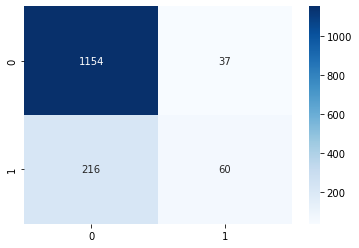

Confusion Matrix of LDA1 Model with Train data :



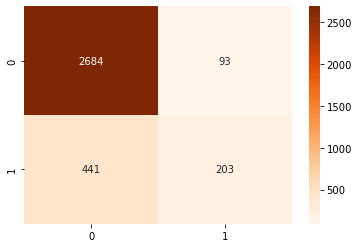


Classification report of LDA1 Model with Test data :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1191
           1       0.62      0.22      0.32       276

    accuracy                           0.83      1467
   macro avg       0.73      0.59      0.61      1467
weighted avg       0.80      0.83      0.79      1467

Classification report of LDA1 Model with Train data :
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2777
           1       0.69      0.32      0.43       644

    accuracy                           0.84      3421
   macro avg       0.77      0.64      0.67      3421
weighted avg       0.83      0.84      0.82      3421


Area under the curve for LDA1 test data is 78.62
Area under the curve for LDA1 train data is 81.06


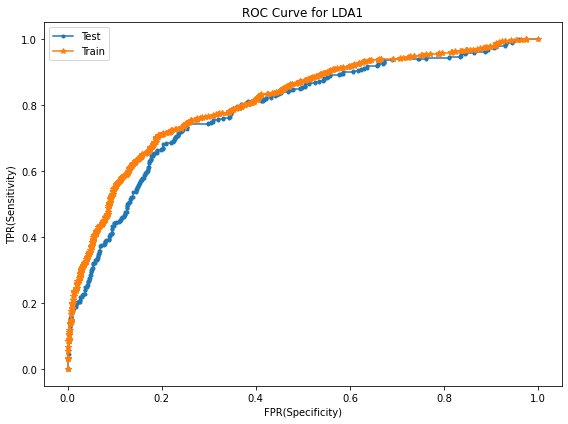

In [134]:
printModelReport("LDA1",y_test,ytest_pred_LDA1,y_train,ytrain_pred_LDA1,ytest_pred_prob_LDA1,ytrain_pred_prob_LDA1)

# K- NearestNeighbour Model

In [135]:
# MODEL 7 : KNearestNeighbours model

KNNModel=KNeighborsClassifier()

In [136]:
KNNModel.fit(X_train,y_train)

KNeighborsClassifier()

In [137]:
KNNModel.fit(X_train,y_train)
ytest_pred_KNN=KNNModel.predict(X_test)
ytrain_pred_KNN=KNNModel.predict(X_train)
ytest_pred_prob_KNN=KNNModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_KNN=KNNModel.predict_proba(X_train)[:,1]

Accuracy Score of KNN Model with Test data : 78.25
Accuracy Score of KNN Model with Train data : 84.04

Confusion Matrix of KNN Model with Test data :



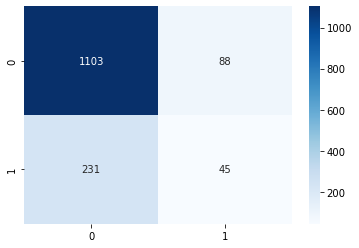

Confusion Matrix of KNN Model with Train data :



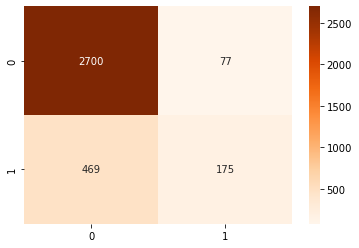


Classification report of KNN Model with Test data :
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      1191
           1       0.34      0.16      0.22       276

    accuracy                           0.78      1467
   macro avg       0.58      0.54      0.55      1467
weighted avg       0.73      0.78      0.75      1467

Classification report of KNN Model with Train data :
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      2777
           1       0.69      0.27      0.39       644

    accuracy                           0.84      3421
   macro avg       0.77      0.62      0.65      3421
weighted avg       0.82      0.84      0.81      3421


Area under the curve for KNN test data is 66.19
Area under the curve for KNN train data is 87.43


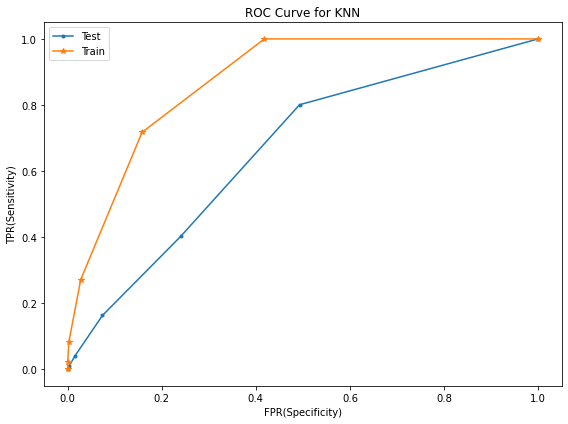

In [138]:
printModelReport("KNN",y_test,ytest_pred_KNN,y_train,ytrain_pred_KNN,ytest_pred_prob_KNN,ytrain_pred_prob_KNN)

## Support Vector Machine

In [139]:
# MODEL8: Support Vector Machines

SVCModel=SVC(probability=True)
SVCModel.fit(X_train,y_train)

SVC(probability=True)

In [140]:
SVCModel.fit(X_train,y_train)
ytest_pred_SVC=SVCModel.predict(X_test)
ytrain_pred_SVC=SVCModel.predict(X_train)
ytest_pred_prob_SVC=SVCModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_SVC=SVCModel.predict_proba(X_train)[:,1]

Accuracy Score of SVC Model with Test data : 81.19
Accuracy Score of SVC Model with Train data : 81.18

Confusion Matrix of SVC Model with Test data :



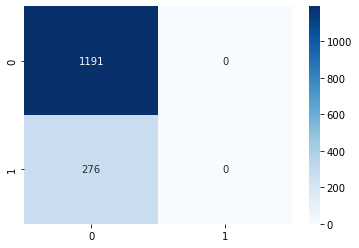

Confusion Matrix of SVC Model with Train data :



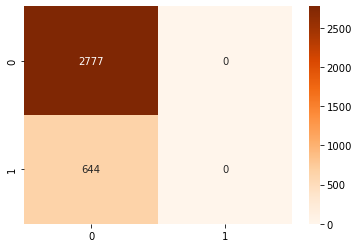


Classification report of SVC Model with Test data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1191
           1       0.00      0.00      0.00       276

    accuracy                           0.81      1467
   macro avg       0.41      0.50      0.45      1467
weighted avg       0.66      0.81      0.73      1467

Classification report of SVC Model with Train data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2777
           1       0.00      0.00      0.00       644

    accuracy                           0.81      3421
   macro avg       0.41      0.50      0.45      3421
weighted avg       0.66      0.81      0.73      3421


Area under the curve for SVC test data is 54.23
Area under the curve for SVC train data is 55.81


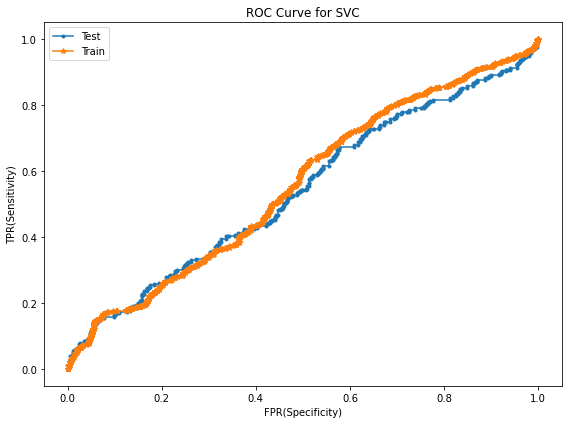

In [141]:
printModelReport("SVC",y_test,ytest_pred_SVC,y_train,ytrain_pred_SVC,ytest_pred_prob_SVC,ytrain_pred_prob_SVC)

* After model tuning accuracy and other performance metrices improved much better than before tuning.

* Best parameters found for SVM algorithm after tuning are {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

* Model accuracy seen at 100% for the train data and 89% for test data.

* 100% train data results seen in all performance metrics. This makes model overfitting

* AUC ROC score also seems overfitting.

# Gausian Model using Bayes

In [142]:
#MODEL 9 : Gausian Model using Bayes theorem

GNBModel=GaussianNB()
GNBModel.fit(X_train,y_train)

GaussianNB()

In [143]:
ytest_pred_GNB=GNBModel.predict(X_test)
ytrain_pred_GNB=GNBModel.predict(X_train)
ytest_pred_prob_GNB=GNBModel.predict_proba(X_test)[:,1]
ytrain_pred_prob_GNB=GNBModel.predict_proba(X_train)[:,1]

Accuracy Score of GNB Model with Test data : 81.05
Accuracy Score of GNB Model with Train data : 82.23

Confusion Matrix of GNB Model with Test data :



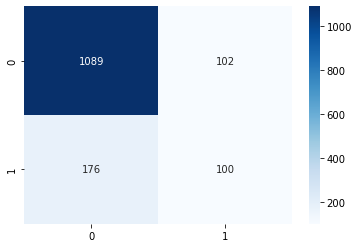

Confusion Matrix of GNB Model with Train data :



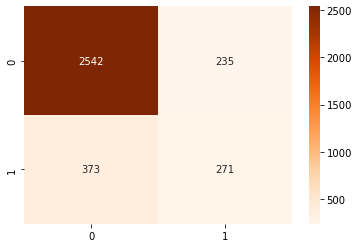


Classification report of GNB Model with Test data :
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      1191
           1       0.50      0.36      0.42       276

    accuracy                           0.81      1467
   macro avg       0.68      0.64      0.65      1467
weighted avg       0.79      0.81      0.80      1467

Classification report of GNB Model with Train data :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2777
           1       0.54      0.42      0.47       644

    accuracy                           0.82      3421
   macro avg       0.70      0.67      0.68      3421
weighted avg       0.81      0.82      0.81      3421


Area under the curve for GNB test data is 74.5
Area under the curve for GNB train data is 77.89


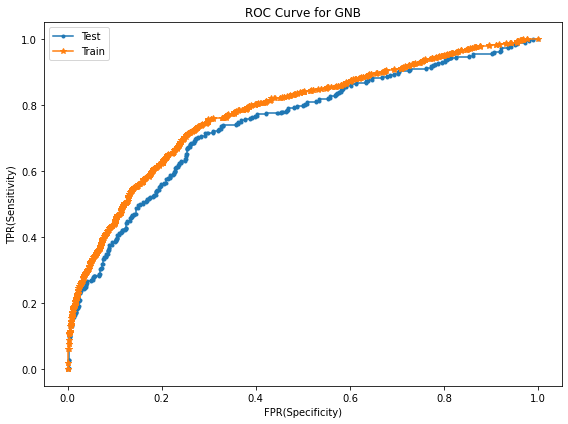

In [144]:
printModelReport("GNB",y_test,ytest_pred_GNB,y_train,ytrain_pred_GNB,ytest_pred_prob_GNB,ytrain_pred_prob_GNB)

In [145]:
PerformanceTable

,DecisionTree_Test,DecisionTree_Train,RandomForest_Test,RandomForest_Train,MLPModel_Test,MLPModel_Train,Logistic_Test,Logistic_Train,LDA1_Test,LDA1_Train,KNN_Test,KNN_Train,SVC_Test,SVC_Train,GNB_Test,GNB_Train
AUC,85.77,100.0,96.27,100.0,50.00,50.00,68.22,73.47,78.62,81.06,66.19,87.43,54.23,55.81,74.50,77.89
Accuracy Score,90.46,100.0,90.73,100.0,81.19,81.18,82.21,82.78,82.75,84.39,78.25,84.04,81.19,81.18,81.05,82.23
Recall Score,78.26,100.0,55.80,100.0,0.00,0.00,10.51,14.13,21.74,31.52,16.30,27.17,0.00,0.00,36.23,42.08
Precision Score,72.97,100.0,91.67,100.0,0.00,0.00,67.44,71.65,61.86,68.58,33.83,69.44,0.00,0.00,49.50,53.56
F1 Score,75.52,100.0,69.37,100.0,0.00,0.00,18.18,23.61,32.17,43.19,22.00,39.06,0.00,0.00,41.84,47.13


In [146]:
PerformanceTable.T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Test,85.77,90.46,78.26,72.97,75.52
DecisionTree_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Test,96.27,90.73,55.80,91.67,69.37
RandomForest_Train,100.00,100.00,100.00,100.00,100.00
MLPModel_Test,50.00,81.19,0.00,0.00,0.00
MLPModel_Train,50.00,81.18,0.00,0.00,0.00
Logistic_Test,68.22,82.21,10.51,67.44,18.18
Logistic_Train,73.47,82.78,14.13,71.65,23.61
LDA1_Test,78.62,82.75,21.74,61.86,32.17
LDA1_Train,81.06,84.39,31.52,68.58,43.19


# Model Tuning 


*   Ensemble modelling, wherever applicable 



In [147]:
# ENSEMBLE MODELLING : Bagging
BaggingClassifier().get_params().keys() 

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [150]:
parameters={"n_estimators":[100,500,1000],
           "max_samples":[10,50,100],
            "max_features":[11,12,13],
           }
BC=BaggingClassifier(base_estimator=DecisionTreeClassifier())

cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
Bag_ModelTuned = GridSearchCV(BC, cv=cv,param_grid=parameters,verbose=2)
Bag_ModelTuned.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_features=11, max_samples=10, n_estimators=100; total time=   0.3s
[CV] END ..max_features=11, max_samples=10, n_estimators=100; total time=   0.3s
[CV] END ..max_features=11, max_samples=10, n_estimators=100; total time=   0.2s
[CV] END ..max_features=11, max_samples=10, n_estimators=100; total time=   0.2s
[CV] END ..max_features=11, max_samples=10, n_estimators=100; total time=   0.2s
[CV] END ..max_features=11, max_samples=10, n_estimators=500; total time=   1.5s
[CV] END ..max_features=11, max_samples=10, n_estimators=500; total time=   1.5s
[CV] END ..max_features=11, max_samples=10, n_estimators=500; total time=   1.6s
[CV] END ..max_features=11, max_samples=10, n_estimators=500; total time=   1.5s
[CV] END ..max_features=11, max_samples=10, n_estimators=500; total time=   1.5s
[CV] END .max_features=11, max_samples=10, n_estimators=1000; total time=   3.3s
[CV] END .max_features=11, max_samples=10, n_es

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [11, 12, 13],
                         'max_samples': [10, 50, 100],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [151]:
Bag_ModelTuned.best_params_

{'max_features': 13, 'max_samples': 100, 'n_estimators': 100}

In [152]:
ytest_pred_Bag=Bag_ModelTuned.predict(X_test)
ytrain_pred_Bag=Bag_ModelTuned.predict(X_train)
ytest_pred_prob_Bag=Bag_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_Bag=Bag_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of Bagging Model with Test data : 82.62
Accuracy Score of Bagging Model with Train data : 82.81

Confusion Matrix of Bagging Model with Test data :



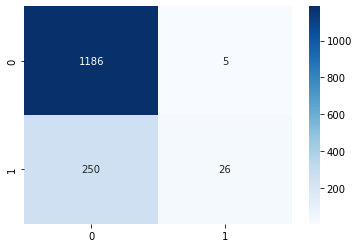

Confusion Matrix of Bagging Model with Train data :



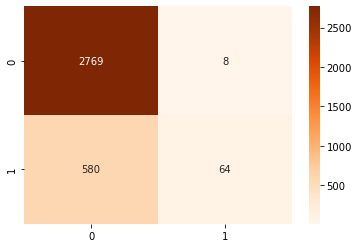


Classification report of Bagging Model with Test data :
               precision    recall  f1-score   support

           0       0.83      1.00      0.90      1191
           1       0.84      0.09      0.17       276

    accuracy                           0.83      1467
   macro avg       0.83      0.55      0.54      1467
weighted avg       0.83      0.83      0.76      1467

Classification report of Bagging Model with Train data :
               precision    recall  f1-score   support

           0       0.83      1.00      0.90      2777
           1       0.89      0.10      0.18       644

    accuracy                           0.83      3421
   macro avg       0.86      0.55      0.54      3421
weighted avg       0.84      0.83      0.77      3421


Area under the curve for Bagging test data is 79.41
Area under the curve for Bagging train data is 85.47


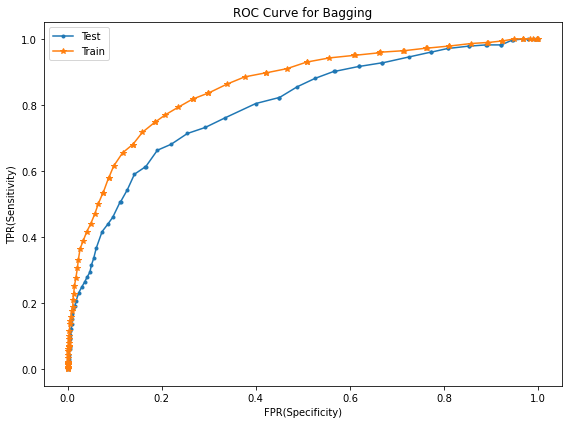

In [153]:
printModelReport("Bagging",y_test,ytest_pred_Bag,y_train,ytrain_pred_Bag,ytest_pred_prob_Bag,ytrain_pred_prob_Bag)

* Bagging model is tuned to get the best hyper parameters.

* Best parameters identified are {'max_features': 13, 'max_samples': 100, 'n_estimators': 100}.

* Bagging model gives the accuracy of 83% train and 82% test.

* It gives very poor performance metrics recall value. But precision value is seen better in this model.

* AUC Score is 86 and 80% with train and test data.

# Gradient Boosting Machine

In [154]:
# Gradient Boost Model
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [155]:
parameters={"n_estimators" : [10, 100, 1000],
            "learning_rate" : [0.001, 0.01],
            "subsample" : [0.7, 1.0],
            "max_depth" : [7, 9]
           }

cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
GBM=GradientBoostingClassifier()
GBoosting_ModelTuned=GridSearchCV(GBM,param_grid=parameters,cv=cv,verbose=2)
GBoosting_ModelTuned.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=7, n_estimators=10, subsample=1.0; total time=   0.1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [7, 9],
                         'n_estimators': [10, 100, 1000],
                         'subsample': [0.7, 1.0]},
             verbose=2)

In [224]:
GBoosting_ModelTuned.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}

In [157]:
ytest_pred_GBoosting=GBoosting_ModelTuned.predict(X_test)
ytrain_pred_GBoosting=GBoosting_ModelTuned.predict(X_train)
ytest_pred_prob_GBoosting=GBoosting_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_GBoosting=GBoosting_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of Gradient Boosting Model with Test data : 92.71
Accuracy Score of Gradient Boosting Model with Train data : 100.0

Confusion Matrix of Gradient Boosting Model with Test data :



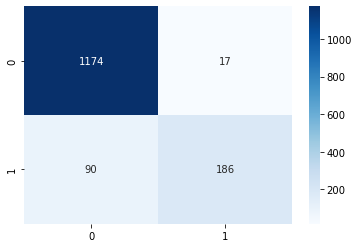

Confusion Matrix of Gradient Boosting Model with Train data :



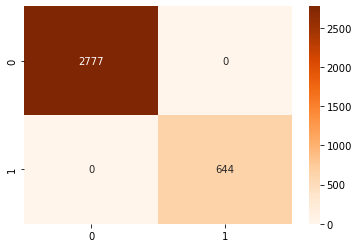


Classification report of Gradient Boosting Model with Test data :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1191
           1       0.92      0.67      0.78       276

    accuracy                           0.93      1467
   macro avg       0.92      0.83      0.87      1467
weighted avg       0.93      0.93      0.92      1467

Classification report of Gradient Boosting Model with Train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


Area under the curve for Gradient Boosting test data is 95.79
Area under the curve for Gradient Boosting train data is 100.0


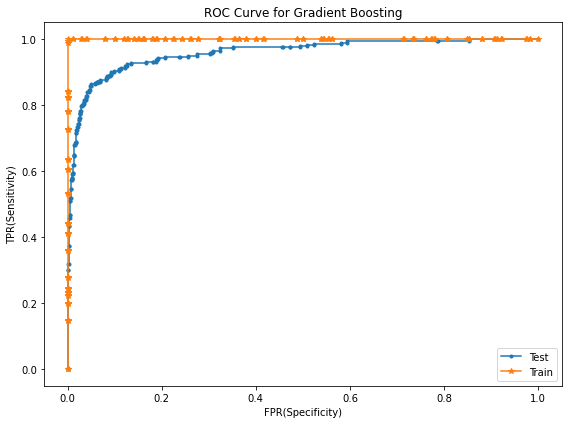

In [158]:
printModelReport("Gradient Boosting",y_test,ytest_pred_GBoosting,y_train,ytrain_pred_GBoosting,ytest_pred_prob_GBoosting,ytrain_pred_prob_GBoosting)

* Gradient Boosting model is tuned to get the best hyper parameters.

* Best parameters identified are {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}

* Gradient model gives the accuracy of 100% train and 93% test.

* It seems as an unfit model

* 100% results seen in all performance metrics. This makes model overfitting

# ADA Boosting Model

In [159]:
# ADA BOOSTING MODEL


AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [160]:
parameters={'n_estimators':[10,100,1000],
           "learning_rate":[0.001,0.01,0.1]
           }
cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
AB_M=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=1)
AB_ModelTuned=GridSearchCV(AB_M,param_grid=parameters,cv=cv,verbose=2)
AB_ModelTuned.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.0s
[CV] END ..............learning_rate=0.001, n_es

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 100, 1000]},
             verbose=2)

In [161]:
AB_ModelTuned.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [162]:
ytest_pred_AB=AB_ModelTuned.predict(X_test)
ytrain_pred_AB=AB_ModelTuned.predict(X_train)
ytest_pred_prob_AB=AB_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_AB=AB_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of Ada Boosting Model with Test data : 89.84
Accuracy Score of Ada Boosting Model with Train data : 100.0

Confusion Matrix of Ada Boosting Model with Test data :



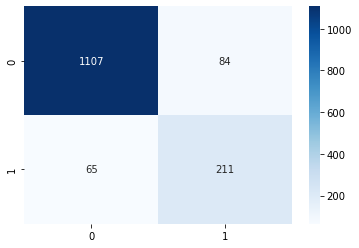

Confusion Matrix of Ada Boosting Model with Train data :



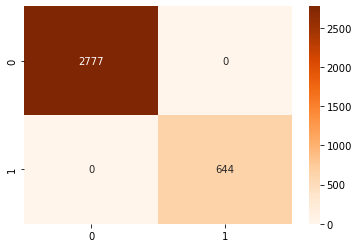


Classification report of Ada Boosting Model with Test data :
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1191
           1       0.72      0.76      0.74       276

    accuracy                           0.90      1467
   macro avg       0.83      0.85      0.84      1467
weighted avg       0.90      0.90      0.90      1467

Classification report of Ada Boosting Model with Train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


Area under the curve for Ada Boosting test data is 84.7
Area under the curve for Ada Boosting train data is 100.0


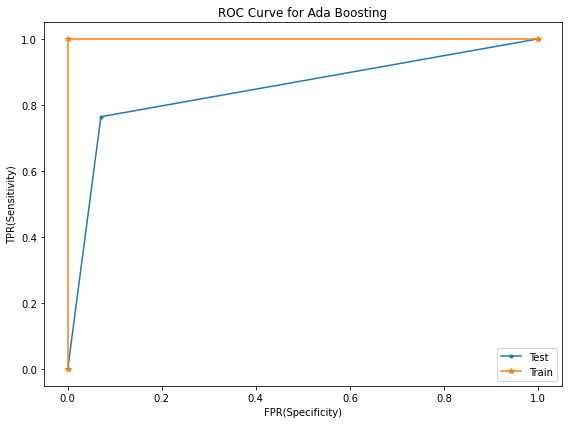

In [163]:
printModelReport("Ada Boosting",y_test,ytest_pred_AB,y_train,ytrain_pred_AB,ytest_pred_prob_AB,ytrain_pred_prob_AB)

* Ada Boosting model is tuned to get the best hyper parameters.

* Best parameters identified are {'learning_rate': 0.001, 'n_estimators': 10}

* Ada Boosting model gives the accuracy of 100% train and 89% test.

* This model is overfitting model

* 100% results seen in all performance metrics. This makes model overfitting

In [164]:
PerformanceTable

,DecisionTree_Test,DecisionTree_Train,RandomForest_Test,RandomForest_Train,MLPModel_Test,MLPModel_Train,Logistic_Test,Logistic_Train,LDA1_Test,LDA1_Train,...,SVC_Test,SVC_Train,GNB_Test,GNB_Train,Bagging_Test,Bagging_Train,Gradient Boosting_Test,Gradient Boosting_Train,Ada Boosting_Test,Ada Boosting_Train
AUC,85.77,100.0,96.27,100.0,50.00,50.00,68.22,73.47,78.62,81.06,...,54.23,55.81,74.50,77.89,79.41,85.47,95.79,100.0,84.70,100.0
Accuracy Score,90.46,100.0,90.73,100.0,81.19,81.18,82.21,82.78,82.75,84.39,...,81.19,81.18,81.05,82.23,82.62,82.81,92.71,100.0,89.84,100.0
Recall Score,78.26,100.0,55.80,100.0,0.00,0.00,10.51,14.13,21.74,31.52,...,0.00,0.00,36.23,42.08,9.42,9.94,67.39,100.0,76.45,100.0
Precision Score,72.97,100.0,91.67,100.0,0.00,0.00,67.44,71.65,61.86,68.58,...,0.00,0.00,49.50,53.56,83.87,88.89,91.63,100.0,71.53,100.0
F1 Score,75.52,100.0,69.37,100.0,0.00,0.00,18.18,23.61,32.17,43.19,...,0.00,0.00,41.84,47.13,16.94,17.88,77.66,100.0,73.91,100.0


In [165]:
TrainModels=[]
TestModels=[]
for  s in PerformanceTable.T.index:
    if "_Train" in s:
        TrainModels.append(s)
        print(s)
    else :
        TestModels.append(s)

DecisionTree_Train
RandomForest_Train
MLPModel_Train
Logistic_Train
LDA1_Train
KNN_Train
SVC_Train
GNB_Train
Bagging_Train
Gradient Boosting_Train
Ada Boosting_Train


In [166]:
PerformanceTable[TrainModels].T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Train,100.00,100.00,100.00,100.00,100.00
MLPModel_Train,50.00,81.18,0.00,0.00,0.00
Logistic_Train,73.47,82.78,14.13,71.65,23.61
LDA1_Train,81.06,84.39,31.52,68.58,43.19
KNN_Train,87.43,84.04,27.17,69.44,39.06
SVC_Train,55.81,81.18,0.00,0.00,0.00
GNB_Train,77.89,82.23,42.08,53.56,47.13
Bagging_Train,85.47,82.81,9.94,88.89,17.88
Gradient Boosting_Train,100.00,100.00,100.00,100.00,100.00


In [167]:
PerformanceTable[TestModels].T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Test,85.77,90.46,78.26,72.97,75.52
RandomForest_Test,96.27,90.73,55.80,91.67,69.37
MLPModel_Test,50.00,81.19,0.00,0.00,0.00
Logistic_Test,68.22,82.21,10.51,67.44,18.18
LDA1_Test,78.62,82.75,21.74,61.86,32.17
KNN_Test,66.19,78.25,16.30,33.83,22.00
SVC_Test,54.23,81.19,0.00,0.00,0.00
GNB_Test,74.50,81.05,36.23,49.50,41.84
Bagging_Test,79.41,82.62,9.42,83.87,16.94
Gradient Boosting_Test,95.79,92.71,67.39,91.63,77.66


* Any other model tuning measures(if applicable)




# Grid Search CV

In [168]:
grid_DecisionTree = {
    'max_depth': [3,5,7],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [15,30,45],
    'criterion':['gini',"entropy"]
}

dct1=DecisionTreeClassifier()
cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
DTree_ModelTuned=GridSearchCV(estimator=dct1,param_grid=grid_DecisionTree,cv=cv)
DTree_ModelTuned.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45]})

In [169]:

ytest_pred_DTM2=DTree_ModelTuned.predict(X_test)
ytrain_pred_DTM2=DTree_ModelTuned.predict(X_train)
ytest_pred_prob_DTM2=DTree_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_DTM2=DTree_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of Decision Tree Tuned Model with Test data : 84.19
Accuracy Score of Decision Tree Tuned Model with Train data : 85.71

Confusion Matrix of Decision Tree Tuned Model with Test data :



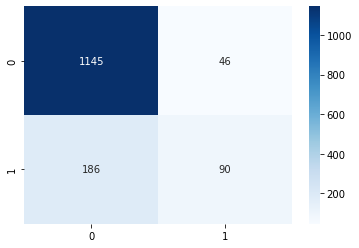

Confusion Matrix of Decision Tree Tuned Model with Train data :



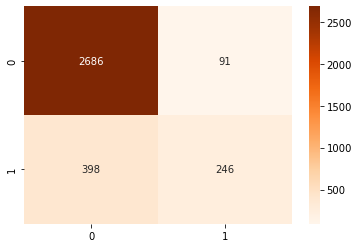


Classification report of Decision Tree Tuned Model with Test data :
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1191
           1       0.66      0.33      0.44       276

    accuracy                           0.84      1467
   macro avg       0.76      0.64      0.67      1467
weighted avg       0.82      0.84      0.82      1467

Classification report of Decision Tree Tuned Model with Train data :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2777
           1       0.73      0.38      0.50       644

    accuracy                           0.86      3421
   macro avg       0.80      0.67      0.71      3421
weighted avg       0.84      0.86      0.84      3421


Area under the curve for Decision Tree Tuned test data is 78.66
Area under the curve for Decision Tree Tuned train data is 84.04


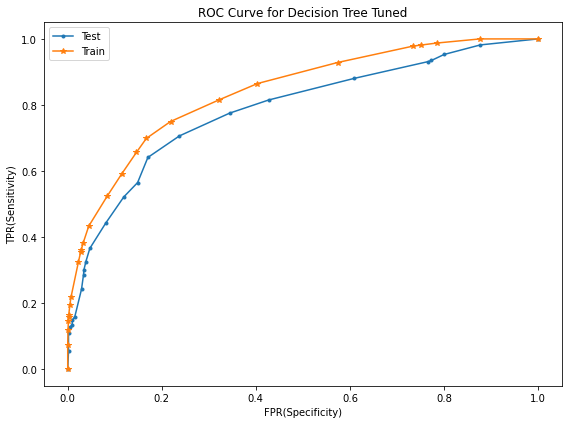

In [170]:
printModelReport("Decision Tree Tuned",y_test,ytest_pred_DTM2,y_train,ytrain_pred_DTM2,ytest_pred_prob_DTM2,ytrain_pred_prob_DTM2)

In [171]:
DTree_ModelTuned.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [172]:
#### 

grid_mlp={
    'hidden_layer_sizes': [100,300],
    'max_iter': [2500,5000],
    'solver': ['adam'],
    'tol': [0.01,0.001],
}
mlpcls=MLPClassifier()
cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
ANN_ModelTuned=GridSearchCV(estimator=mlpcls,param_grid=grid_mlp,cv=cv,verbose=2)
ANN_ModelTuned.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.01; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.01; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.01; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.01; total time=   0.3s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.01; total time=   0.1s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.001; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.001; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.001; total time=   0.2s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.001; total time=   0.1s
[CV] END hidden_layer_sizes=100, max_iter=2500, solver=adam, tol=0.001; total time=   0.1s
[CV] END hidden_layer_sizes=100, ma

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [100, 300],
                         'max_iter': [2500, 5000], 'solver': ['adam'],
                         'tol': [0.01, 0.001]},
             verbose=2)

In [173]:

ytest_pred_ANN=ANN_ModelTuned.predict(X_test)
ytrain_pred_ANN=ANN_ModelTuned.predict(X_train)
ytest_pred_prob_ANN=ANN_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_ANN=ANN_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of ANN Tuned Model with Test data : 81.19
Accuracy Score of ANN Tuned Model with Train data : 81.18

Confusion Matrix of ANN Tuned Model with Test data :



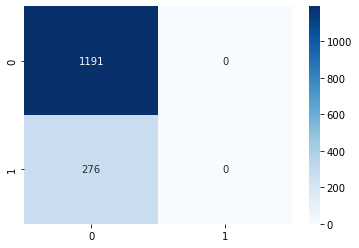

Confusion Matrix of ANN Tuned Model with Train data :



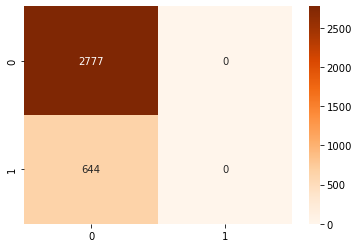


Classification report of ANN Tuned Model with Test data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1191
           1       0.00      0.00      0.00       276

    accuracy                           0.81      1467
   macro avg       0.41      0.50      0.45      1467
weighted avg       0.66      0.81      0.73      1467

Classification report of ANN Tuned Model with Train data :
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2777
           1       0.00      0.00      0.00       644

    accuracy                           0.81      3421
   macro avg       0.41      0.50      0.45      3421
weighted avg       0.66      0.81      0.73      3421


Area under the curve for ANN Tuned test data is 60.36
Area under the curve for ANN Tuned train data is 63.45


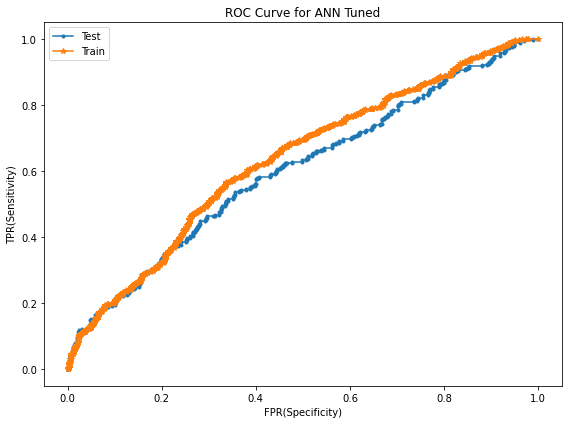

In [174]:
printModelReport("ANN Tuned",y_test,ytest_pred_ANN,y_train,ytrain_pred_ANN,ytest_pred_prob_ANN,ytrain_pred_prob_ANN)

In [175]:
#####

RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [176]:
parameters = {
    'max_depth': [5,7,10],
    'max_features':[12,13],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [15,30,45],
    'n_estimators':[701,901]
}
rfc1=RandomForestClassifier(oob_score=True)
cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
RandomForest_ModelTuned=GridSearchCV(rfc1,param_grid=parameters,cv=cv,verbose=2)
RandomForest_ModelTuned.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=701; total time=   2.9s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=701; total time=   2.7s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=701; total time=   2.7s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=901; total time=   3.1s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=901; total time=   3.6s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=15, n_estimators=901; total time=   3.5s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=30, n_estimators=701; total time=   2.7s
[CV] END max_depth=5, max_features=12, min_samples_leaf=5, min_samples_split=30, n_estimators=701; total time= 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [12, 13],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [701, 901]},
             verbose=2)

In [177]:
RandomForest_ModelTuned.best_params_

{'max_depth': 10,
 'max_features': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 901}

In [178]:
ytest_pred_RandomForest=RandomForest_ModelTuned.predict(X_test)
ytrain_pred_RandomForest=RandomForest_ModelTuned.predict(X_train)
ytest_pred_prob_RandomForest=RandomForest_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_RandomForest=RandomForest_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of RandomForestTuned Model with Test data : 86.37
Accuracy Score of RandomForestTuned Model with Train data : 92.17

Confusion Matrix of RandomForestTuned Model with Test data :



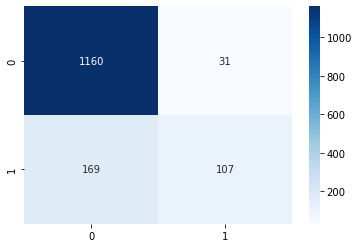

Confusion Matrix of RandomForestTuned Model with Train data :



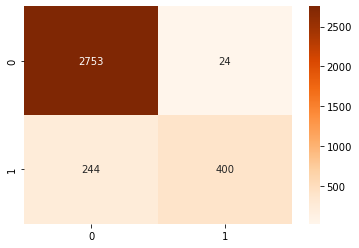


Classification report of RandomForestTuned Model with Test data :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1191
           1       0.78      0.39      0.52       276

    accuracy                           0.86      1467
   macro avg       0.82      0.68      0.72      1467
weighted avg       0.85      0.86      0.84      1467

Classification report of RandomForestTuned Model with Train data :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2777
           1       0.94      0.62      0.75       644

    accuracy                           0.92      3421
   macro avg       0.93      0.81      0.85      3421
weighted avg       0.92      0.92      0.92      3421


Area under the curve for RandomForestTuned test data is 91.05
Area under the curve for RandomForestTuned train data is 98.16


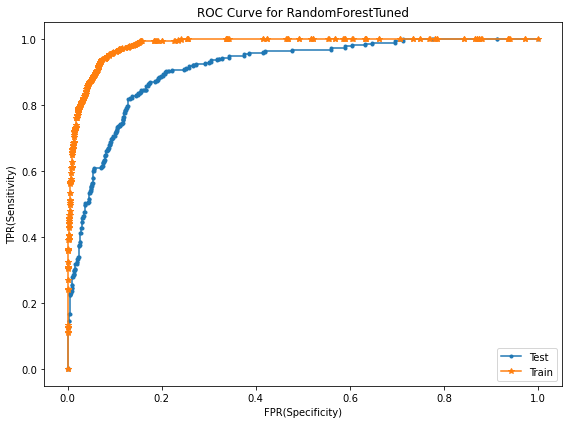

In [179]:
printModelReport("RandomForestTuned",y_test,ytest_pred_RandomForest,y_train,ytrain_pred_RandomForest,ytest_pred_prob_RandomForest,ytrain_pred_prob_RandomForest)

# KNN Model finding best K Value

In [180]:

KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [181]:
KNN_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    KNN_scores.append(score)

MCE = [1 - x for x in KNN_scores]
MCE

[0.15746421267893662,
 0.23653715064758007,
 0.21745057941376955,
 0.20040899795501022,
 0.20381731424676208,
 0.19495569188820727,
 0.19291070211315609,
 0.1915473755964554,
 0.1915473755964554,
 0.1915473755964554]

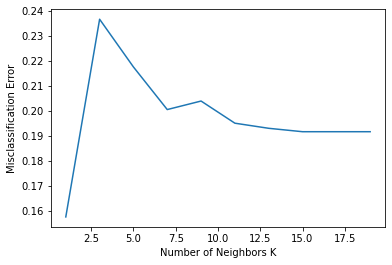

In [182]:
pt.plot(range(1,20,2), MCE)
pt.xlabel('Number of Neighbors K')
pt.ylabel('Misclassification Error')
pt.show()

In [183]:
KNN_ModelTuned=KNeighborsClassifier(n_neighbors=11)
KNN_ModelTuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [184]:
ytest_pred_KNN=KNN_ModelTuned.predict(X_test)
ytrain_pred_KNN=KNN_ModelTuned.predict(X_train)
ytest_pred_prob_KNN=KNN_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_KNN=KNN_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of KNN_Tuned Model with Test data : 80.5
Accuracy Score of KNN_Tuned Model with Train data : 81.12

Confusion Matrix of KNN_Tuned Model with Test data :



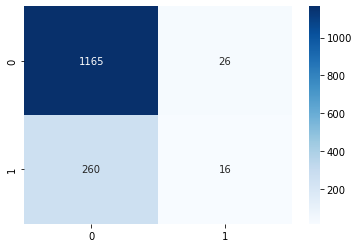

Confusion Matrix of KNN_Tuned Model with Train data :



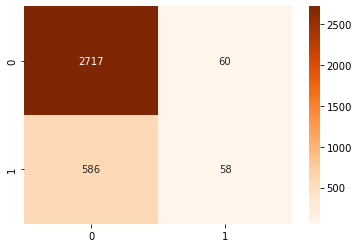


Classification report of KNN_Tuned Model with Test data :
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1191
           1       0.38      0.06      0.10       276

    accuracy                           0.81      1467
   macro avg       0.60      0.52      0.50      1467
weighted avg       0.74      0.81      0.74      1467

Classification report of KNN_Tuned Model with Train data :
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      2777
           1       0.49      0.09      0.15       644

    accuracy                           0.81      3421
   macro avg       0.66      0.53      0.52      3421
weighted avg       0.76      0.81      0.75      3421


Area under the curve for KNN_Tuned test data is 62.96
Area under the curve for KNN_Tuned train data is 77.49


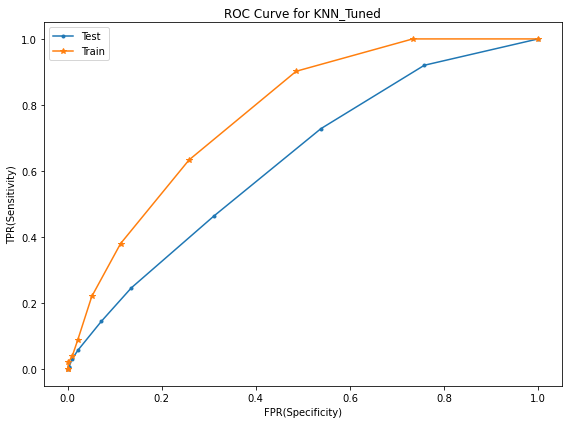

In [185]:
printModelReport("KNN_Tuned",y_test,ytest_pred_KNN,y_train,ytrain_pred_KNN,ytest_pred_prob_KNN,ytrain_pred_prob_KNN)

In [186]:
### 

SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [187]:
C=[0.05,0.1,0.5,1,10]
gamma=['auto','scale']
kernel=['rbf']
hyperparameters={'kernel':kernel,'C':C,'gamma':gamma}
cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
SVM_ModelTuned=GridSearchCV(estimator=SVC(probability=True),param_grid=hyperparameters,cv=cv,verbose=2)
SVM_ModelTuned.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................C=0.05, gamma=auto, kernel=rbf; total time=   3.9s
[CV] END .....................C=0.05, gamma=auto, kernel=rbf; total time=   3.2s
[CV] END .....................C=0.05, gamma=auto, kernel=rbf; total time=   3.2s
[CV] END ....................C=0.05, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END ....................C=0.05, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END ....................C=0.05, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.4s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.05, 0.1, 0.5, 1, 10],
                         'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
             verbose=2)

In [188]:
SVM_ModelTuned.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [189]:
ytest_pred_SVC=SVM_ModelTuned.predict(X_test)
ytrain_pred_SVC=SVM_ModelTuned.predict(X_train)
ytest_pred_prob_SVC=SVM_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_SVC=SVM_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of SVC_Tuned Model with Test data : 89.84
Accuracy Score of SVC_Tuned Model with Train data : 100.0

Confusion Matrix of SVC_Tuned Model with Test data :



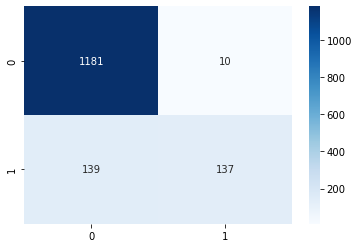

Confusion Matrix of SVC_Tuned Model with Train data :



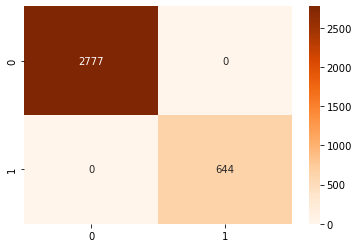


Classification report of SVC_Tuned Model with Test data :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1191
           1       0.93      0.50      0.65       276

    accuracy                           0.90      1467
   macro avg       0.91      0.74      0.79      1467
weighted avg       0.90      0.90      0.89      1467

Classification report of SVC_Tuned Model with Train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421


Area under the curve for SVC_Tuned test data is 88.97
Area under the curve for SVC_Tuned train data is 100.0


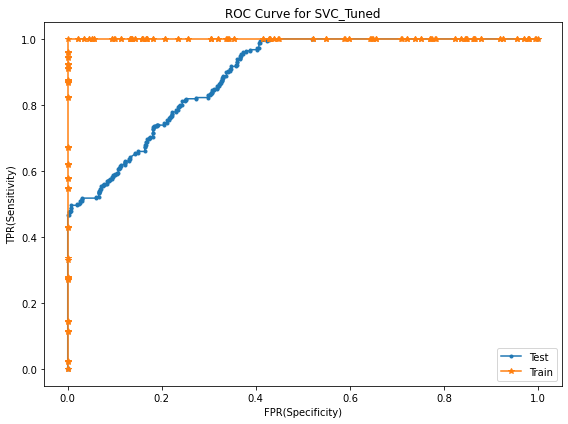

In [190]:
printModelReport("SVC_Tuned",y_test,ytest_pred_SVC,y_train,ytrain_pred_SVC,ytest_pred_prob_SVC,ytrain_pred_prob_SVC)

# Naive Bayes Tuning

In [191]:
### Naive Bayes Tuned

In [192]:
parameters = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001,0.0000001]
}

cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

GM=GaussianNB()
Naive_ModelTuned = GridSearchCV(GM, cv=cv,param_grid=parameters)
Naive_ModelTuned.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-08, 1e-07]})

In [193]:
Naive_ModelTuned.best_params_

{'priors': None, 'var_smoothing': 1e-08}

In [194]:
ytest_pred_Naive2=Naive_ModelTuned.predict(X_test)
ytrain_pred_Naive2=Naive_ModelTuned.predict(X_train)
ytest_pred_prob_Naive2=Naive_ModelTuned.predict_proba(X_test)[:,1]
ytrain_pred_prob_Naive2=Naive_ModelTuned.predict_proba(X_train)[:,1]

Accuracy Score of Naive2_Tuned Model with Test data : 83.37
Accuracy Score of Naive2_Tuned Model with Train data : 83.81

Confusion Matrix of Naive2_Tuned Model with Test data :



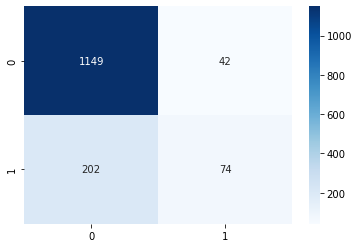

Confusion Matrix of Naive2_Tuned Model with Train data :



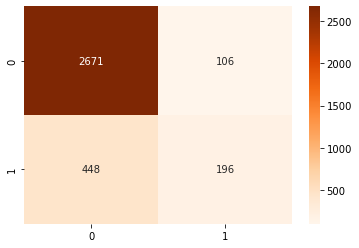


Classification report of Naive2_Tuned Model with Test data :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1191
           1       0.64      0.27      0.38       276

    accuracy                           0.83      1467
   macro avg       0.74      0.62      0.64      1467
weighted avg       0.81      0.83      0.80      1467

Classification report of Naive2_Tuned Model with Train data :
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2777
           1       0.65      0.30      0.41       644

    accuracy                           0.84      3421
   macro avg       0.75      0.63      0.66      3421
weighted avg       0.82      0.84      0.81      3421


Area under the curve for Naive2_Tuned test data is 73.24
Area under the curve for Naive2_Tuned train data is 77.09


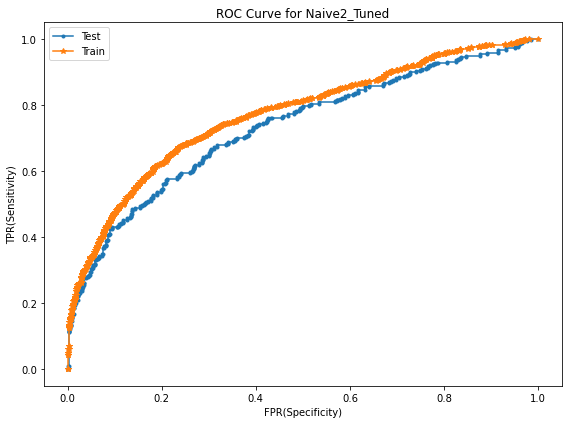

In [195]:
printModelReport("Naive2_Tuned",y_test,ytest_pred_Naive2,y_train,ytrain_pred_Naive2,ytest_pred_prob_Naive2,ytrain_pred_prob_Naive2)

* When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

* Naïve Bayes model before and after tuning produces the same accuracy results with 82%.

* Better recall, precision, f1 scores are seen than SVM model from Naïve Bayes model.

* Not much hyper parameters are there for this model.

* So, tuning won’t improve this model accuracy a lot.

* This model seems to perform at moderate level.

# Logit Model building after removing unwanted variables

In [196]:
X.columns

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'LoginType',
       'Male_Customer', 'Large_Business', 'Salaried', 'Small_Business',
       'Married', 'Single', 'Unmarried'],
      dtype='object')

In [197]:
default_train=pd.concat([X_train,y_train],axis=1)
default_test=pd.concat([X_test,y_test],axis=1)

In [198]:
for col in X.columns:
    print(col," + ",end="")

Age  + CityTier  + DurationOfPitch  + NumberOfPersonVisited  + NumberOfFollowups  + ProductPitched  + PreferredPropertyStar  + NumberOfTrips  + Passport  + PitchSatisfactionScore  + OwnCar  + NumberOfChildrenVisited  + Designation  + MonthlyIncome  + LoginType  + Male_Customer  + Large_Business  + Salaried  + Small_Business  + Married  + Single  + Unmarried  + 

* As we seen in previous model many insignificant values are seen in model building. Also, we checked whether any multicollinearity problem in model building.

# Variance Inflation Factor

In [199]:
#####VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,MonthlyIncome,137.239828
18,Salaried,56.270678
19,Small_Business,50.394845
4,NumberOfPersonVisited,30.696465
1,Age,25.317876
13,Designation,22.046787
7,PreferredPropertyStar,21.511827
5,NumberOfFollowups,17.937221
17,Large_Business,11.061930
6,ProductPitched,7.019367


A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

*  Normally VIF value higher than 10 have more multicollinearity between them.

* Those can be removed while model building.

* So MonthlyIncome, Salaried, Age, Small_Business, NumberOfPersonVisited, PreferredPropertyStar, Designation, NumberOfFollowups variables can be removed the data.

* Log2 model was built with all significant variables.

* Next is to find out the best cut off point to separate the two classes.

* ROC_CURVE function best cut off point identified is 0.1823

* Train and test data are validated with this optimized model. Accuracy score is at 70%

* Higher recall value is seen in this model other than all models.

* F1 score is at average of 50%

* Passport, Single, married, Large Business, City Tier are the positive variables help in predicting the target class.

* ProductPitched, LoginType are the variables have negative impact on target variable.

In [200]:
for col in X.columns:
    print(col," + ",end="")

Age  + CityTier  + DurationOfPitch  + NumberOfPersonVisited  + NumberOfFollowups  + ProductPitched  + PreferredPropertyStar  + NumberOfTrips  + Passport  + PitchSatisfactionScore  + OwnCar  + NumberOfChildrenVisited  + Designation  + MonthlyIncome  + LoginType  + Male_Customer  + Large_Business  + Salaried  + Small_Business  + Married  + Single  + Unmarried  + 

In [201]:
import statsmodels.formula.api as SM
Log=SM.logit(formula='ProdTaken ~  CityTier  + DurationOfPitch   + ProductPitched  + NumberOfTrips  + Passport  + PitchSatisfactionScore  + OwnCar  + NumberOfChildrenVisited   + LoginType  + Male_Customer  + Large_Business  + Small_Business  + Married  + Single  + Unmarried',data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.403935
         Iterations 7


In [202]:
Log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 3421
Model:                          Logit   Df Residuals:                     3405
Method:                           MLE   Df Model:                           15
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.1649
Time:                        22:14:01   Log-Likelihood:                -1381.9
converged:                       True   LL-Null:                       -1654.6
Covariance Type:            nonrobust   LLR p-value:                1.263e-106
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1360      0.293    -10.693      0.000      -3.711      -2.561
CityTier                    0.3596      0.053      6.798      0.000       0.256       0.463
DurationOfPitch             0.0256      0.006      4.330      0.000       0.014       0.037
ProductPitched             -0.4184      0.043     -9.790      0.000      -0.502      -0.335
NumberOfTrips               0.0637      0.026      2.447      0.014       0.013       0.115
Passport                    1.3905      0.098     14.119      0.000       1.197       1.584
PitchSatisfactionScore      0.1042      0.036      2.909      0.004       0.034       0.174
OwnCar                     -0.0210      0.099     -0.212      0.832      -0.215       0.173
NumberOfChildrenVisited     0.0467      0.058      0.807      0.420      -0.067       0.160
LoginType                  -0.3007      0.103     -2.914      0.004      -0.503      -0.098
Male_Customer               0.3435      0.100      3.419      0.001       0.147       0.540
Large_Business              0.6401      0.156      4.102      0.000       0.334       0.946
Small_Business             -0.0489      0.104     -0.469      0.639      -0.253       0.156
Married                     0.2134      0.147      1.447      0.148      -0.076       0.502
Single                      1.4723      0.159      9.254      0.000       1.160       1.784
Unmarried                   0.8684      0.174      4.994      0.000       0.528       1.209
===========================================================================================
"""

In [203]:

Log2=SM.logit(formula='ProdTaken ~  CityTier  + DurationOfPitch   + ProductPitched  + NumberOfTrips  + Passport  + PitchSatisfactionScore  + LoginType  + Male_Customer  + Large_Business  + Single  + Unmarried',data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.404386
         Iterations 6


In [204]:
Log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 3421
Model:                          Logit   Df Residuals:                     3409
Method:                           MLE   Df Model:                           11
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.1639
Time:                        22:14:01   Log-Likelihood:                -1383.4
converged:                       True   LL-Null:                       -1654.6
Covariance Type:            nonrobust   LLR p-value:                2.747e-109
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.9583      0.255    -11.620      0.000      -3.457      -2.459
CityTier                   0.3544      0.052      6.777      0.000       0.252       0.457
DurationOfPitch            0.0255      0.006      4.325      0.000       0.014       0.037
ProductPitched            -0.4190      0.043     -9.807      0.000      -0.503      -0.335
NumberOfTrips              0.0675      0.026      2.635      0.008       0.017       0.118
Passport                   1.3943      0.098     14.173      0.000       1.201       1.587
PitchSatisfactionScore     0.1038      0.036      2.895      0.004       0.034       0.174
LoginType                 -0.3059      0.103     -2.968      0.003      -0.508      -0.104
Male_Customer              0.3439      0.100      3.428      0.001       0.147       0.541
Large_Business             0.6603      0.148      4.447      0.000       0.369       0.951
Single                     1.3106      0.115     11.428      0.000       1.086       1.535
Unmarried                  0.7259      0.134      5.408      0.000       0.463       0.989
==========================================================================================
"""

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2777
           1       0.64      0.21      0.32       644

    accuracy                           0.83      3421
   macro avg       0.74      0.59      0.61      3421
weighted avg       0.80      0.83      0.79      3421

Accuracy Score : 0.8292896813797135


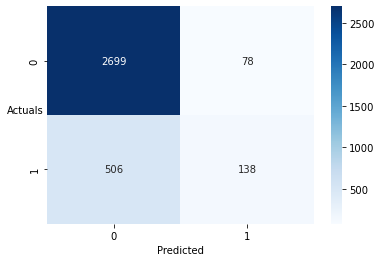

In [205]:
y_prob_pred_train = Log2.predict(default_train)
y_prob_pred_train
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

sns.heatmap((confusion_matrix(default_train['ProdTaken'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
pt.xlabel('Predicted');
pt.ylabel('Actuals',rotation=0);
print(classification_report(default_train['ProdTaken'],y_class_pred))
print("Accuracy Score :",accuracy_score(default_train['ProdTaken'],y_class_pred))


              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1191
           1       0.63      0.18      0.28       276

    accuracy                           0.83      1467
   macro avg       0.74      0.58      0.59      1467
weighted avg       0.80      0.83      0.78      1467

Accuracy Score : 0.8261758691206544


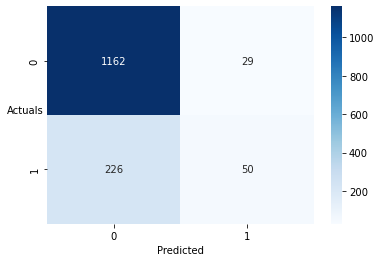

In [206]:
y_prob_pred_test = Log2.predict(default_test)
y_prob_pred_test
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

sns.heatmap((confusion_matrix(default_test['ProdTaken'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
pt.xlabel('Predicted');
pt.ylabel('Actuals',rotation=0);
print(classification_report(default_test['ProdTaken'],y_class_pred))
print("Accuracy Score :",accuracy_score(default_test['ProdTaken'],y_class_pred))

In [207]:
# FINDING OPTIMUM CUTOFF


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(default_train['ProdTaken'],y_prob_pred_train)

In [208]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.18235319997344993

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      2777
           1       0.36      0.74      0.48       644

    accuracy                           0.70      3421
   macro avg       0.64      0.72      0.64      3421
weighted avg       0.81      0.70      0.73      3421

Accuracy Score : 0.7044723764981


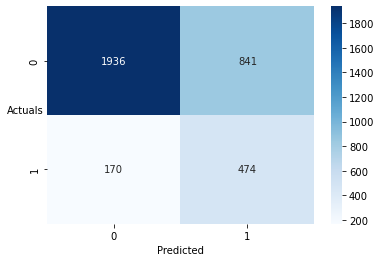

In [209]:
y_prob_pred_train = Log2.predict(default_train)
y_prob_pred_train
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.1823:
        a=1
    else:
        a=0
    y_class_pred.append(a)

sns.heatmap((confusion_matrix(default_train['ProdTaken'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
pt.xlabel('Predicted');
pt.ylabel('Actuals',rotation=0);
print(classification_report(default_train['ProdTaken'],y_class_pred))
print("Accuracy Score :",accuracy_score(default_train['ProdTaken'],y_class_pred))

In [210]:
round(roc_auc_score(default_train['ProdTaken'],y_prob_pred_train)*100,2)

77.34

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1191
           1       0.35      0.70      0.47       276

    accuracy                           0.70      1467
   macro avg       0.63      0.70      0.63      1467
weighted avg       0.80      0.70      0.73      1467

Accuracy Score : 0.700068166325835


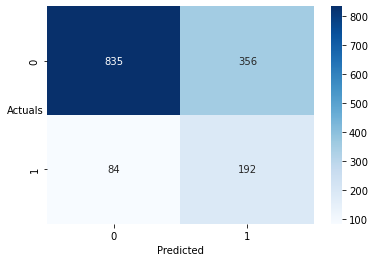

In [211]:
y_prob_pred_test = Log2.predict(default_test)
y_prob_pred_test
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.1823:
        a=1
    else:
        a=0
    y_class_pred.append(a)

sns.heatmap((confusion_matrix(default_test['ProdTaken'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
pt.xlabel('Predicted');
pt.ylabel('Actuals',rotation=0);
print(classification_report(default_test['ProdTaken'],y_class_pred))
print("Accuracy Score :",accuracy_score(default_test['ProdTaken'],y_class_pred))

In [212]:
round(roc_auc_score(default_test['ProdTaken'],y_prob_pred_test)*100,2)

75.87

In [213]:
PerformanceTable["LogitTunedTrain"]=[77.34,70.44,74,36,48]
PerformanceTable["LogitTunedTest"]=[75.87,70.06,70,35,47]

In [214]:
PerformanceTable

,DecisionTree_Test,DecisionTree_Train,RandomForest_Test,RandomForest_Train,MLPModel_Test,MLPModel_Train,Logistic_Test,Logistic_Train,LDA1_Test,LDA1_Train,...,RandomForestTuned_Test,RandomForestTuned_Train,KNN_Tuned_Test,KNN_Tuned_Train,SVC_Tuned_Test,SVC_Tuned_Train,Naive2_Tuned_Test,Naive2_Tuned_Train,LogitTunedTrain,LogitTunedTest
AUC,85.77,100.0,96.27,100.0,50.00,50.00,68.22,73.47,78.62,81.06,...,91.05,98.16,62.96,77.49,88.97,100.0,73.24,77.09,77.34,75.87
Accuracy Score,90.46,100.0,90.73,100.0,81.19,81.18,82.21,82.78,82.75,84.39,...,86.37,92.17,80.50,81.12,89.84,100.0,83.37,83.81,70.44,70.06
Recall Score,78.26,100.0,55.80,100.0,0.00,0.00,10.51,14.13,21.74,31.52,...,38.77,62.11,5.80,9.01,49.64,100.0,26.81,30.43,74.00,70.00
Precision Score,72.97,100.0,91.67,100.0,0.00,0.00,67.44,71.65,61.86,68.58,...,77.54,94.34,38.10,49.15,93.20,100.0,63.79,64.90,36.00,35.00
F1 Score,75.52,100.0,69.37,100.0,0.00,0.00,18.18,23.61,32.17,43.19,...,51.69,74.91,10.06,15.22,64.78,100.0,37.76,41.44,48.00,47.00


In [215]:
Log2.params

Intercept                -2.958327
CityTier                  0.354426
DurationOfPitch           0.025535
ProductPitched           -0.419046
NumberOfTrips             0.067515
Passport                  1.394282
PitchSatisfactionScore    0.103752
LoginType                -0.305881
Male_Customer             0.343918
Large_Business            0.660339
Single                    1.310647
Unmarried                 0.725931
dtype: float64

In [216]:
TrainModels=[]
TestModels=[]
for  s in PerformanceTable.T.index:
    if "Train" in s:
        TrainModels.append(s)
        print(s)
    elif "Test" in s:
        TestModels.append(s)

DecisionTree_Train
RandomForest_Train
MLPModel_Train
Logistic_Train
LDA1_Train
KNN_Train
SVC_Train
GNB_Train
Bagging_Train
Gradient Boosting_Train
Ada Boosting_Train
Decision Tree Tuned_Train
ANN Tuned_Train
RandomForestTuned_Train
KNN_Tuned_Train
SVC_Tuned_Train
Naive2_Tuned_Train
LogitTunedTrain


In [217]:
PerformanceTable[TrainModels].T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Train,100.00,100.00,100.00,100.00,100.00
MLPModel_Train,50.00,81.18,0.00,0.00,0.00
Logistic_Train,73.47,82.78,14.13,71.65,23.61
LDA1_Train,81.06,84.39,31.52,68.58,43.19
KNN_Train,87.43,84.04,27.17,69.44,39.06
SVC_Train,55.81,81.18,0.00,0.00,0.00
GNB_Train,77.89,82.23,42.08,53.56,47.13
Bagging_Train,85.47,82.81,9.94,88.89,17.88
Gradient Boosting_Train,100.00,100.00,100.00,100.00,100.00


In [218]:
PerformanceTable[TestModels].T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Test,85.77,90.46,78.26,72.97,75.52
RandomForest_Test,96.27,90.73,55.80,91.67,69.37
MLPModel_Test,50.00,81.19,0.00,0.00,0.00
Logistic_Test,68.22,82.21,10.51,67.44,18.18
LDA1_Test,78.62,82.75,21.74,61.86,32.17
KNN_Test,66.19,78.25,16.30,33.83,22.00
SVC_Test,54.23,81.19,0.00,0.00,0.00
GNB_Test,74.50,81.05,36.23,49.50,41.84
Bagging_Test,79.41,82.62,9.42,83.87,16.94
Gradient Boosting_Test,95.79,92.71,67.39,91.63,77.66


In [219]:
PerformanceTable[TestModels].T["Accuracy Score"].sort_values(ascending=False)

Gradient Boosting_Test      92.71
RandomForest_Test           90.73
DecisionTree_Test           90.46
Ada Boosting_Test           89.84
SVC_Tuned_Test              89.84
RandomForestTuned_Test      86.37
Decision Tree Tuned_Test    84.19
Naive2_Tuned_Test           83.37
LDA1_Test                   82.75
Bagging_Test                82.62
Logistic_Test               82.21
SVC_Test                    81.19
MLPModel_Test               81.19
ANN Tuned_Test              81.19
GNB_Test                    81.05
KNN_Tuned_Test              80.50
KNN_Test                    78.25
LogitTunedTest              70.06
Name: Accuracy Score, dtype: float64

In [220]:
PerformanceTable.T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
DecisionTree_Test,85.77,90.46,78.26,72.97,75.52
DecisionTree_Train,100.00,100.00,100.00,100.00,100.00
RandomForest_Test,96.27,90.73,55.80,91.67,69.37
RandomForest_Train,100.00,100.00,100.00,100.00,100.00
MLPModel_Test,50.00,81.19,0.00,0.00,0.00
MLPModel_Train,50.00,81.18,0.00,0.00,0.00
Logistic_Test,68.22,82.21,10.51,67.44,18.18
Logistic_Train,73.47,82.78,14.13,71.65,23.61
LDA1_Test,78.62,82.75,21.74,61.86,32.17
LDA1_Train,81.06,84.39,31.52,68.58,43.19


In [221]:
FilteredModels=["Logistic_Test","Logistic_Train","LDA1_Test","LDA1_Train","Bagging_Train","Bagging_Test","Decision Tree Tuned_Train","Decision Tree Tuned_Test","ANN Tuned_Train","ANN Tuned_Test","RandomForestTuned_Train","RandomForestTuned_Test","KNN_Tuned_Train","KNN_Tuned_Test","SVC_Tuned_Train","SVC_Tuned_Test","Naive2_Tuned_Train","Naive2_Tuned_Test","LogitTunedTrain","LogitTunedTest"]
TrainModels=[]
TestModels=[]
for  s in FilteredModels:
    if "Train" in s:
        TrainModels.append(s)
        print(s)
    elif "Test" in s:
        TestModels.append(s)


Logistic_Train
LDA1_Train
Bagging_Train
Decision Tree Tuned_Train
ANN Tuned_Train
RandomForestTuned_Train
KNN_Tuned_Train
SVC_Tuned_Train
Naive2_Tuned_Train
LogitTunedTrain


In [222]:
PerformanceTable[TrainModels].T


,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
Logistic_Train,73.47,82.78,14.13,71.65,23.61
LDA1_Train,81.06,84.39,31.52,68.58,43.19
Bagging_Train,85.47,82.81,9.94,88.89,17.88
Decision Tree Tuned_Train,84.04,85.71,38.20,73.00,50.15
ANN Tuned_Train,63.45,81.18,0.00,0.00,0.00
RandomForestTuned_Train,98.16,92.17,62.11,94.34,74.91
KNN_Tuned_Train,77.49,81.12,9.01,49.15,15.22
SVC_Tuned_Train,100.00,100.00,100.00,100.00,100.00
Naive2_Tuned_Train,77.09,83.81,30.43,64.90,41.44
LogitTunedTrain,77.34,70.44,74.00,36.00,48.00


In [223]:
PerformanceTable[TestModels].T

,AUC,Accuracy Score,Recall Score,Precision Score,F1 Score
Logistic_Test,68.22,82.21,10.51,67.44,18.18
LDA1_Test,78.62,82.75,21.74,61.86,32.17
Bagging_Test,79.41,82.62,9.42,83.87,16.94
Decision Tree Tuned_Test,78.66,84.19,32.61,66.18,43.69
ANN Tuned_Test,60.36,81.19,0.00,0.00,0.00
RandomForestTuned_Test,91.05,86.37,38.77,77.54,51.69
KNN_Tuned_Test,62.96,80.50,5.80,38.10,10.06
SVC_Tuned_Test,88.97,89.84,49.64,93.20,64.78
Naive2_Tuned_Test,73.24,83.37,26.81,63.79,37.76
LogitTunedTest,75.87,70.06,70.00,35.00,47.00


## Conclusion

Amongst all the models trained, we observed that Randomforest Classifier and Logit model performed better.

* For accuracy, AUC score, precision, recall value, f1 score metrics. For Randomforest Classifier-
  Accuracy, AUC score, precision, recall value, f1 score were better.

* For Logit Model-
    Recall metric was better.

* Around 75% of the data fits the ROC AUC curve. Also, True Positives and Negatives identified by the model are 835 and 192 respectively.

* Passport, Single, Married, Large Business, City Tier are the positive variables and help in predicting target variable.

* Product Pitched and LoginType are negative variables and affect the target variable negatively.

## Recommendations to Tourism company

* Pitch satisfaction needs to be improved a lot

* More follow ups and offers can be given to 2nd, 3rd tier customers

* Family ,couple packages can be introduced to cover married customers 

* Prices for Product Pitched can be reduced a little.

* Recommending to take passport for all customers.

* Outliers and missing values to be taken care.

* Analyze the reviews of all customers and notify the improvement made on negative part.


## References

* Dataset - (https://figshare.com/articles/dataset/Tourism_csv/19350668)
* Decision Tree - (https://scikit-learn.org/stable/modules/tree.html)
* Random Forest - (https://builtin.com/data-science/random-forest-algorithm)
* Bagging - (https://machinelearningmastery.com/bagging-ensemble-with-python/)
* Naives Bayes - (https://www.geeksforgeeks.org/naive-bayes-classifiers/)
* SVM - (https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/)
* VIF - (https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)
* KNN - (https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
* ROC - (https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* Confusion Matrix - (https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/)

MIT License
Copyright (c) 2022 mandardeshmukh7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE